# UNIVARIADO
## df_309

Este es el notebook donde hago todo los modelos necesarios para mi cuarta serie.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization, Dropout, LSTM, TimeDistributed, Reshape, Conv2D, MaxPooling2D, Input
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import plot_model
import optuna

2025-04-03 18:44:51.358303: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-03 18:44:51.359199: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-03 18:44:51.363057: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-03 18:44:51.375036: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743727491.400522   77420 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743727491.40

In [2]:
df1 = pd.read_csv("univariate/Hourly-train.csv")
df1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V952,V953,V954,V955,V956,V957,V958,V959,V960,V961
0,H1,605.0,586.0,586.0,559.0,511.0,443.0,422.0,395.0,382.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,H2,3124.0,2990.0,2862.0,2809.0,2544.0,2201.0,1996.0,1861.0,1735.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H3,1828.0,1806.0,1897.0,1750.0,1679.0,1620.0,1463.0,1342.0,1192.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H4,6454.0,6324.0,6075.0,5949.0,5858.0,5579.0,5163.0,4790.0,4478.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H5,4263.0,4297.0,4236.0,4080.0,3883.0,3672.0,3248.0,2841.0,2513.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,H410,153.0,196.0,163.0,131.0,82.0,53.0,57.0,54.0,46.0,...,132.0,165.0,191.0,186.0,119.0,108.0,70.0,72.0,79.0,77.0
410,H411,24.0,30.0,22.0,14.0,19.0,20.0,24.0,45.0,38.0,...,122.0,195.0,166.0,154.0,132.0,76.0,66.0,67.0,51.0,42.0
411,H412,19.0,30.0,12.0,16.0,13.0,15.0,15.0,21.0,21.0,...,111.0,166.0,225.0,278.0,144.0,71.0,70.0,73.0,39.0,36.0
412,H413,21.0,16.0,17.0,19.0,16.0,22.0,21.0,15.0,23.0,...,77.0,91.0,76.0,68.0,68.0,59.0,58.0,53.0,38.0,46.0


In [3]:
df1.set_index(df1.columns[0], inplace=True)

# Transponer el DataFrame
df_t = df1.T

df_t

V1,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,...,H405,H406,H407,H408,H409,H410,H411,H412,H413,H414
V2,605.0,3124.0,1828.0,6454.0,4263.0,5780.0,52817.0,32479.0,39455.0,513.0,...,68.0,21.0,214.0,19.0,31.0,153.0,24.0,19.0,21.0,15.0
V3,586.0,2990.0,1806.0,6324.0,4297.0,5497.0,51773.0,31018.0,38279.0,512.0,...,48.0,15.0,238.0,31.0,39.0,196.0,30.0,30.0,16.0,13.0
V4,586.0,2862.0,1897.0,6075.0,4236.0,5306.0,50907.0,30033.0,36944.0,506.0,...,33.0,15.0,130.0,25.0,22.0,163.0,22.0,12.0,17.0,13.0
V5,559.0,2809.0,1750.0,5949.0,4080.0,5178.0,50224.0,27716.0,35984.0,500.0,...,21.0,17.0,69.0,23.0,17.0,131.0,14.0,16.0,19.0,16.0
V6,511.0,2544.0,1679.0,5858.0,3883.0,5235.0,49496.0,25067.0,33721.0,490.0,...,30.0,15.0,68.0,14.0,13.0,82.0,19.0,13.0,16.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,138.0,80.0,423.0,257.0,69.0,108.0,76.0,71.0,59.0,48.0
V958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,116.0,71.0,290.0,194.0,53.0,70.0,66.0,70.0,58.0,41.0
V959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.0,74.0,264.0,110.0,50.0,72.0,67.0,73.0,53.0,35.0
V960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.0,41.0,194.0,81.0,54.0,79.0,51.0,39.0,38.0,26.0


In [4]:
df_t["H309"]

V2      12.4
V3      11.8
V4      11.3
V5      10.8
V6      10.5
        ... 
V957    25.6
V958    23.8
V959    22.2
V960    21.2
V961    20.3
Name: H309, Length: 960, dtype: float64

In [5]:
df2 = pd.read_csv("univariate/m4_info.csv")
df2.head(2)

,M4id,category,Frequency,Horizon,SP,StartingDate
0,Y1,Macro,1,6,Yearly,01-01-79 12:00
1,Y2,Macro,1,6,Yearly,01-01-79 12:00


In [6]:
mine = ['H309', 'H291', 'H143', 'H366', 'H174']

filtered_df = df2[df2['M4id'].isin(mine)]

print(filtered_df)

       M4id category  Frequency  Horizon      SP    StartingDate
99728  H143    Other         24       48  Hourly   06-10-13 3:00
99759  H174    Other         24       48  Hourly  17-05-10 12:00
99876  H291    Other         24       48  Hourly  02-06-10 12:00
99894  H309    Other         24       48  Hourly  10-05-10 12:00
99951  H366    Other         24       48  Hourly  01-01-17 12:00


# H309

In [7]:
# Definir la fecha de inicio
start_date = pd.to_datetime("10-05-10 12:00", format="%d-%m-%y %H:%M")

# Crear un rango de fechas con una hora de diferencia para cada fila de H143
index = pd.date_range(start=start_date, periods=len(df_t["H309"]), freq="H")

# Asignar el nuevo índice de tiempo a la serie
df_h309 = df_t["H309"].copy()
df_h309.index = index

df_h309 = pd.DataFrame({"time": index, "y": df_t["H309"].values})
df_h309 =df_h309.dropna(subset=['y'])
df_h309


/tmp/ipykernel_77420/370940607.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index = pd.date_range(start=start_date, periods=len(df_t["H309"]), freq="H")


,time,y
0,2010-05-10 12:00:00,12.4
1,2010-05-10 13:00:00,11.8
2,2010-05-10 14:00:00,11.3
3,2010-05-10 15:00:00,10.8
4,2010-05-10 16:00:00,10.5
...,...,...
955,2010-06-19 07:00:00,25.6
956,2010-06-19 08:00:00,23.8
957,2010-06-19 09:00:00,22.2
958,2010-06-19 10:00:00,21.2


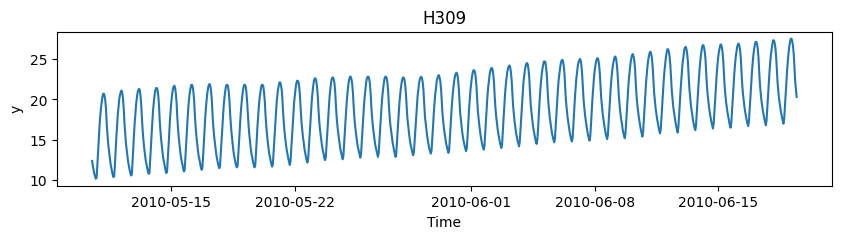

In [8]:
df_h309['time'] = pd.to_datetime(df_h309['time'])

plt.figure(figsize=(10, 2))

plt.plot(df_h309['time'], df_h309['y'], label='H309')
plt.xlabel('Time')
plt.ylabel('y')
plt.title('H309')

plt.show()


In [9]:
# Aplicar la prueba de Dickey-Fuller
result = adfuller(df_h309["y"])

# Mostrar los resultados
print("Resultados de la Prueba de Dickey-Fuller Aumentada:")
print(f"Estadístico ADF: {result[0]}")
print(f"Valor p: {result[1]}")
print(f"Número de retardos usados: {result[2]}")
print(f"Número de observaciones: {result[3]}")
print("Valores críticos:")
for key, value in result[4].items():
    print(f"  {key}: {value}")

# Interpretación del resultado
alpha = 0.05  # Nivel de significancia del 5%
if result[1] < alpha:
    print("\nConclusión: La serie es estacionaria (se rechaza la hipótesis nula).")
else:
    print("\nConclusión: La serie NO es estacionaria (no se puede rechazar la hipótesis nula).")


Resultados de la Prueba de Dickey-Fuller Aumentada:
Estadístico ADF: 1.8931043378273262
Valor p: 0.9985168437882262
Número de retardos usados: 22
Número de observaciones: 937
Valores críticos:
  1%: -3.4373481911362997
  5%: -2.864629502968925
  10%: -2.56841503507527

Conclusión: La serie NO es estacionaria (no se puede rechazar la hipótesis nula).


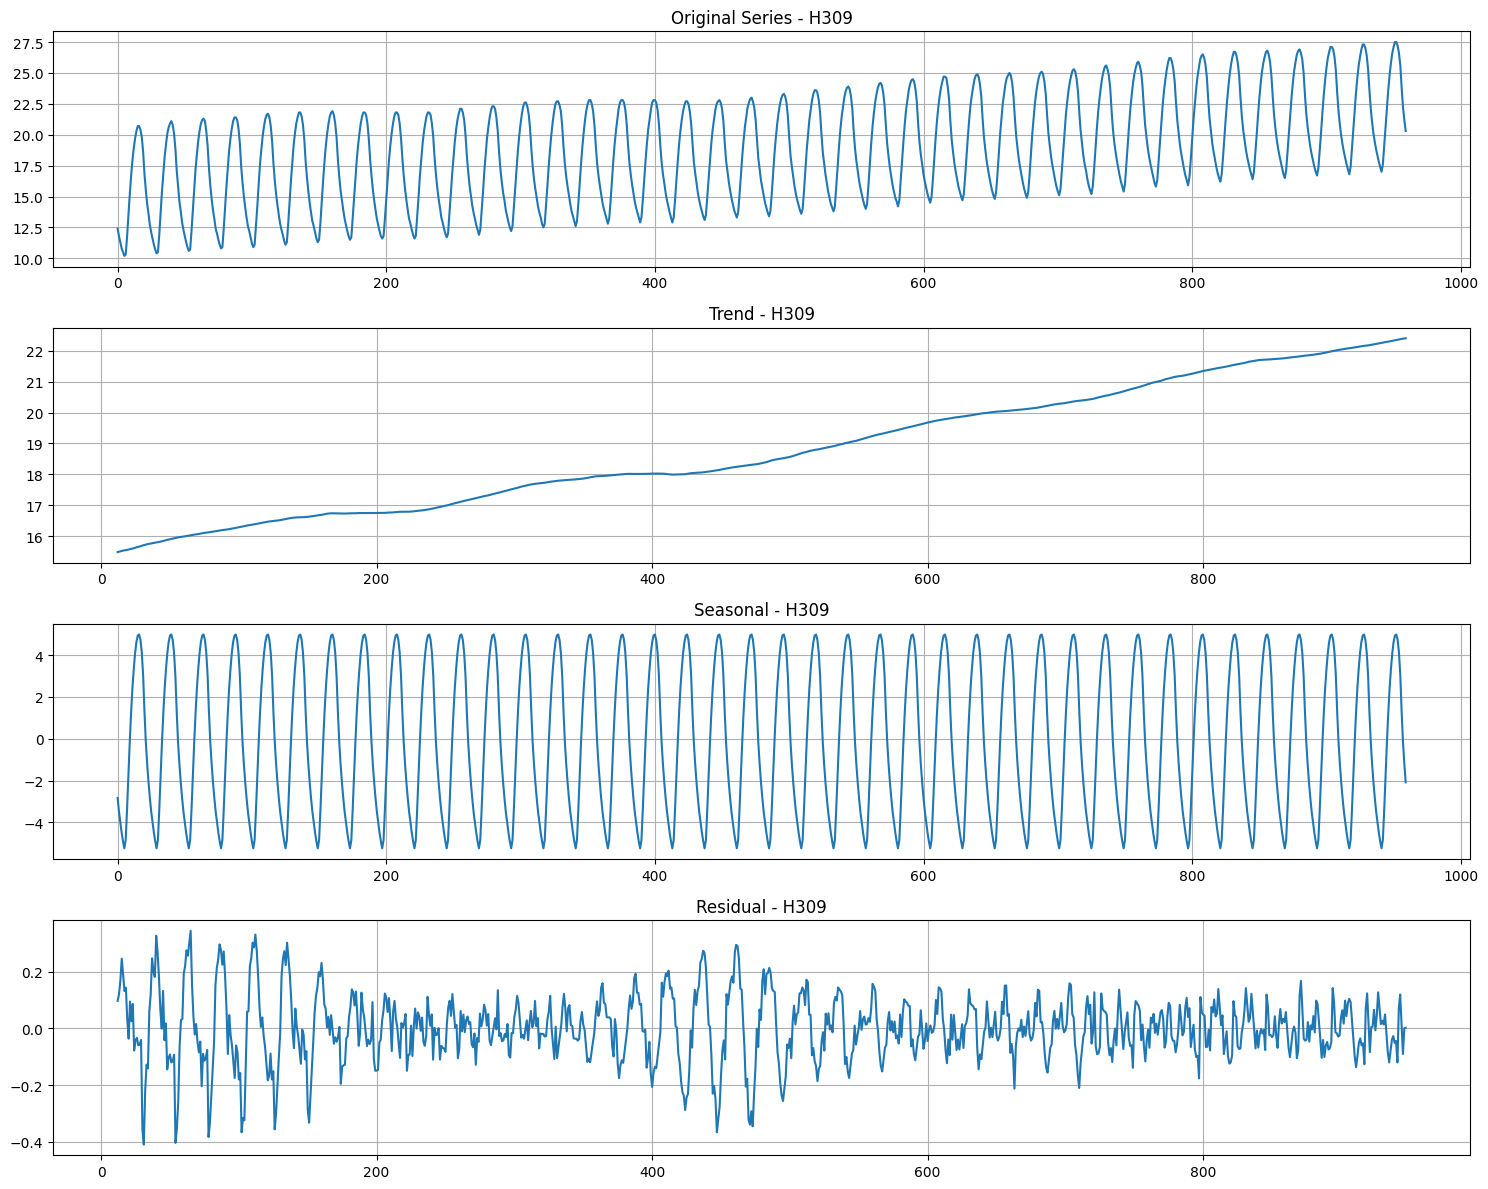

In [10]:
def plot_decomposition(series, series_name, period=24): #24 por que son por hora
    decomposition = seasonal_decompose(series, model='additive', period=period)

    # Crear subgráficos
    fig, axes = plt.subplots(4, 1, figsize=(15, 12))

    titles = ["Original Series", "Trend", "Seasonal", "Residual"]
    components = [decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid]

    for ax, title, comp in zip(axes, titles, components):
        ax.plot(comp)
        ax.set_title(f"{title} - {series_name}")
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Aplicar la descomposición estacional
plot_decomposition(df_h309["y"], "H309")


Se puede ver que tiene una tendencia creciente, y un patron estacional repetitivo. Esto al igual que el test de dickey fuller nos dice que no es estacionaria, ya que su media cambia a lo largo del tiempo. 

Para hacerla estacionaria, se podria eliminar la tendencia haciendo alguna diferenciación. 

El residuo, parece ser muy aleatorio. Tal vez podria mejorar con alguna transofrmaciòn. 


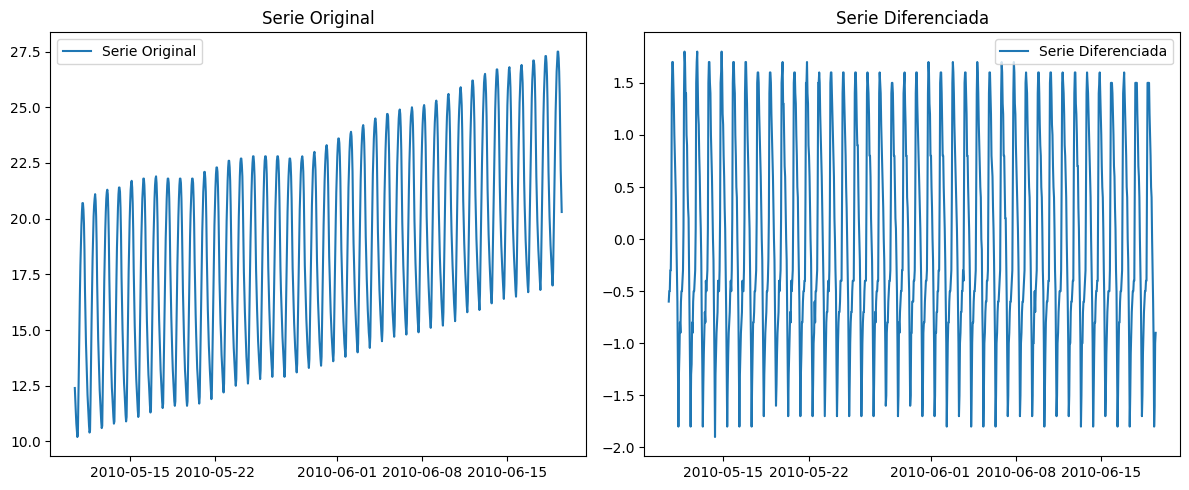

🔹 Resultado de Dickey-Fuller después de la diferenciación:
   - Estadístico: -40.265523250717976
   - P-valor: 0.0
   - Valores Críticos: {'1%': np.float64(-3.43735568849112), '5%': np.float64(-2.864632808981867), '10%': np.float64(-2.5684167960132225)}
La serie diferenciada es estacionaria (rechazamos H0)


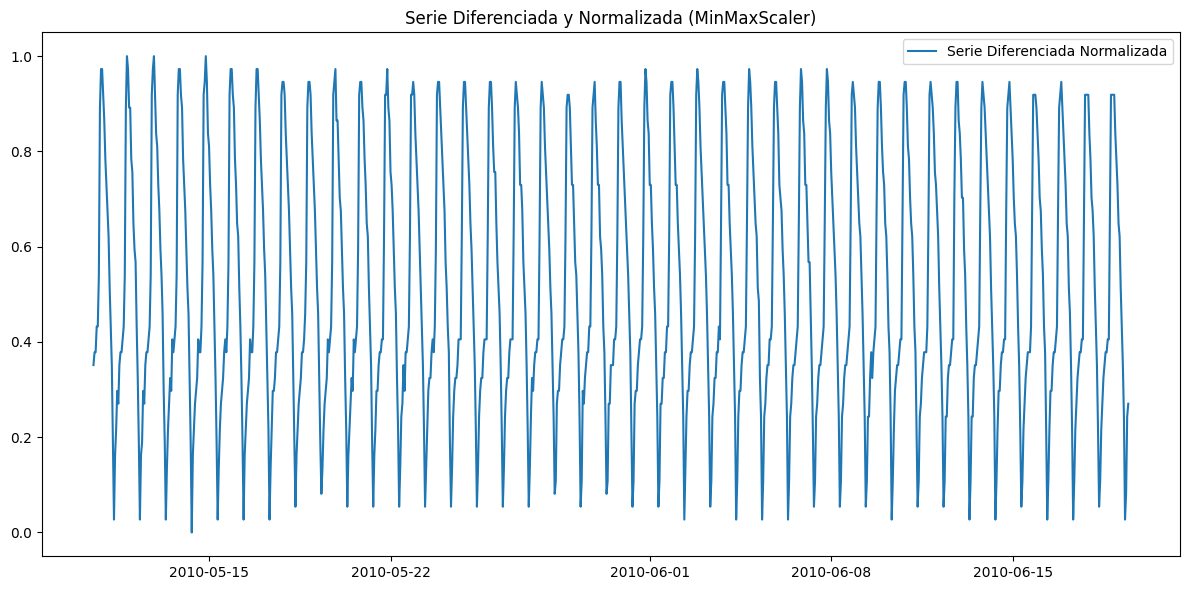

In [11]:
#diferenciacion
df_h309.set_index('time', inplace=True)

df_h309['y_diff'] = df_h309['y'].diff()

# Graficar la serie original y diferenciada
plt.figure(figsize=(12, 5))

# Serie original
plt.subplot(1, 2, 1)
plt.plot(df_h309.index, df_h309['y'], label='Serie Original')  # Usar el índice (fechas) para el eje x
plt.title('Serie Original')
plt.legend()

# Serie diferenciada
plt.subplot(1, 2, 2)
plt.plot(df_h309.index, df_h309['y_diff'], label='Serie Diferenciada')  # Usar el índice (fechas) para el eje x
plt.title('Serie Diferenciada')
plt.legend()

plt.tight_layout()
plt.show()

# Aplicar test de Dickey-Fuller para verificar estacionariedad
resultado = adfuller(df_h309['y_diff'].dropna())
print("🔹 Resultado de Dickey-Fuller después de la diferenciación:")
print(f"   - Estadístico: {resultado[0]}")
print(f"   - P-valor: {resultado[1]}")
print(f"   - Valores Críticos: {resultado[4]}")

# Evaluar si la serie diferenciada es estacionaria
if resultado[1] < 0.05:
    print("La serie diferenciada es estacionaria (rechazamos H0)")
else:
    print("La serie diferenciada NO es estacionaria (no rechazamos H0)")

# Normalizar la serie diferenciada utilizando MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))  
df_h309['y_diff_scaled'] = scaler.fit_transform(df_h309[['y_diff']])

# Graficar la serie diferenciada normalizada
plt.figure(figsize=(12, 6))
plt.plot(df_h309.index, df_h309['y_diff_scaled'], label='Serie Diferenciada Normalizada')
plt.title('Serie Diferenciada y Normalizada (MinMaxScaler)')
plt.legend()

plt.tight_layout()
plt.show()


## División


In [12]:
# Definir los tamaños de los conjuntos (por ejemplo, 70% para entrenamiento, 15% para validación y 15% para prueba)
train_size = int(len(df_h309) * 0.7)
val_size = int(len(df_h309) * 0.15)
test_size = len(df_h309) - train_size - val_size

# Dividir la serie en entrenamiento, validación y prueba
train, val, test = df_h309[:train_size], df_h309[train_size:train_size+val_size], df_h309[train_size+val_size:]

# Verificar la división

print(f"Tamaño de entrenamiento: {len(train)}")
print(f"Tamaño de validación: {len(val)}")
print(f"Tamaño de prueba: {len(test)}")


Tamaño de entrenamiento: 672
Tamaño de validación: 144
Tamaño de prueba: 144


El horizonte para esta serie es 48, como todas las que me tocaron

In [13]:
horizon = 48  # Puedes ajustar esto según necesites

# Obtener la última fecha de cada conjunto
train_last_date = train.index[-1]
val_last_date = val.index[-1]
test_last_date = test.index[-1]

# Generar las fechas futuras para el horizonte de predicción
train_pred_horizon = pd.date_range(start=train_last_date, periods=horizon + 1, freq='H')[1:]
val_pred_horizon = pd.date_range(start=val_last_date, periods=horizon + 1, freq='H')[1:]
test_pred_horizon = pd.date_range(start=test_last_date, periods=horizon + 1, freq='H')[1:]

# Mostrar resultados
print(f"Última fecha del conjunto de entrenamiento: {train_last_date}")
print(f"Horizonte de predicción para entrenamiento:\n{train_pred_horizon}")

print(f"\nÚltima fecha del conjunto de validación: {val_last_date}")
print(f"Horizonte de predicción para validación:\n{val_pred_horizon}")

print(f"\nÚltima fecha del conjunto de prueba: {test_last_date}")
print(f"Horizonte de predicción para prueba:\n{test_pred_horizon}")

Última fecha del conjunto de entrenamiento: 2010-06-07 11:00:00
Horizonte de predicción para entrenamiento:
DatetimeIndex(['2010-06-07 12:00:00', '2010-06-07 13:00:00',
               '2010-06-07 14:00:00', '2010-06-07 15:00:00',
               '2010-06-07 16:00:00', '2010-06-07 17:00:00',
               '2010-06-07 18:00:00', '2010-06-07 19:00:00',
               '2010-06-07 20:00:00', '2010-06-07 21:00:00',
               '2010-06-07 22:00:00', '2010-06-07 23:00:00',
               '2010-06-08 00:00:00', '2010-06-08 01:00:00',
               '2010-06-08 02:00:00', '2010-06-08 03:00:00',
               '2010-06-08 04:00:00', '2010-06-08 05:00:00',
               '2010-06-08 06:00:00', '2010-06-08 07:00:00',
               '2010-06-08 08:00:00', '2010-06-08 09:00:00',
               '2010-06-08 10:00:00', '2010-06-08 11:00:00',
               '2010-06-08 12:00:00', '2010-06-08 13:00:00',
               '2010-06-08 14:00:00', '2010-06-08 15:00:00',
               '2010-06-08 16:00:00', 

/tmp/ipykernel_77420/377691022.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  train_pred_horizon = pd.date_range(start=train_last_date, periods=horizon + 1, freq='H')[1:]
/tmp/ipykernel_77420/377691022.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  val_pred_horizon = pd.date_range(start=val_last_date, periods=horizon + 1, freq='H')[1:]
/tmp/ipykernel_77420/377691022.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  test_pred_horizon = pd.date_range(start=test_last_date, periods=horizon + 1, freq='H')[1:]


In [14]:
# Eliminar el primer valor NaN de la serie diferenciada
df_h309['y_diff'] = df_h309['y'].diff()
df_h309 = df_h309.dropna()  # Elimina filas con NaN después de la diferenciación

# Normalizar la serie diferenciada
scaler = MinMaxScaler(feature_range=(0, 1))  
df_h309['y_diff_scaled'] = scaler.fit_transform(df_h309[['y_diff']])


/tmp/ipykernel_77420/1763522273.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h309['y_diff_scaled'] = scaler.fit_transform(df_h309[['y_diff']])


In [15]:
train_size = int(len(df_h309) * 0.7)
val_size = int(len(df_h309) * 0.15)
test_size = len(df_h309) - train_size - val_size

train, val, test = df_h309[:train_size], df_h309[train_size:train_size+val_size], df_h309[train_size+val_size:]


# Creación de modelos

In [16]:
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


n_steps = 48  # Horizonte de predicción
n_features = 1


In [17]:
# Aplicar la función de división
X_train, y_train = split_univariate_sequence(train['y_diff_scaled'].values, n_steps)
X_val, y_val = split_univariate_sequence(val['y_diff_scaled'].values, n_steps)
X_test, y_test = split_univariate_sequence(test['y_diff_scaled'].values, n_steps)


In [18]:
# Ajustar la forma para CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

### CNN 1

In [19]:
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

loss = model.evaluate(X_test, y_test)
print(f'Error cuadrático medio en prueba: {loss}')

/home/maripau/Documents/ITESO/Semestre6/Modelos no lineales/Examen2/examen2_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-03 18:44:54.905876: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1101 - val_loss: 0.0142
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - val_loss: 0.0040
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0035 - val_loss: 0.0020
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.9230e-04 - val_loss: 0.0011
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.8044e-04 - val_loss: 0.0010
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.5011e-04 - val_loss: 8.7691e-04
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5700e-04 - val_loss: 8.3442e-04
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7079e-04 - val_loss: 0.0011
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.5387e-04 - val_loss: 7.9830e-04
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━

<Axes: >

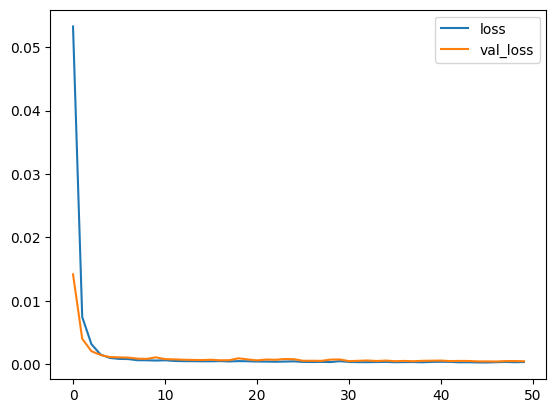

In [20]:
pd.DataFrame(history.history).plot()

In [21]:
scaler = MinMaxScaler()
scaler.fit(y_train.reshape(-1, 1))  

MinMaxScaler()

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


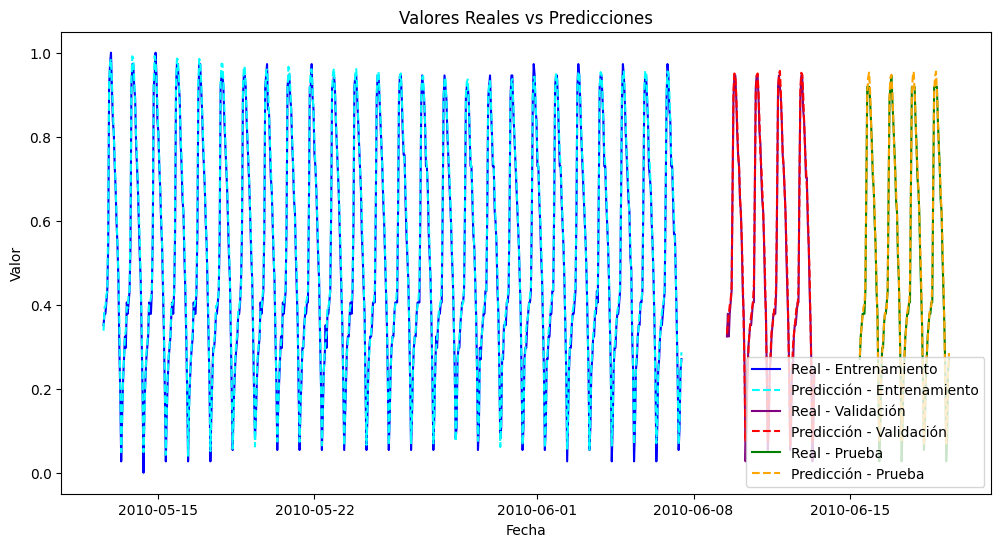

In [22]:

# Predicciones entrenamiento, validación y prueba
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)  
y_test_pred = model.predict(X_test)

#quitar normalizacion
y_train_pred_inv = scaler.inverse_transform(y_train_pred)
y_val_pred_inv = scaler.inverse_transform(y_val_pred)  
y_test_pred_inv = scaler.inverse_transform(y_test_pred)

#  valores reales vs. predichos 
plt.figure(figsize=(12, 6))

# inverse_transform
y_train_reshaped = y_train.reshape(-1, 1)  
plt.plot(train.index[n_steps:], scaler.inverse_transform(y_train_reshaped), label='Real - Entrenamiento', color='blue')
plt.plot(train.index[n_steps:], y_train_pred_inv, label='Predicción - Entrenamiento', color='cyan', linestyle='dashed')

# validación
y_val_reshaped = y_val.reshape(-1, 1)  
plt.plot(val.index[n_steps:], scaler.inverse_transform(y_val_reshaped), label='Real - Validación', color='purple')
plt.plot(val.index[n_steps:], y_val_pred_inv, label='Predicción - Validación', color='red', linestyle='dashed')

# prueba
y_test_reshaped = y_test.reshape(-1, 1)  
plt.plot(test.index[n_steps:], scaler.inverse_transform(y_test_reshaped), label='Real - Prueba', color='green')
plt.plot(test.index[n_steps:], y_test_pred_inv, label='Predicción - Prueba', color='orange', linestyle='dashed')

plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Valores Reales vs Predicciones')
plt.legend()
plt.show()


In [23]:
mae = mean_absolute_error(y_test_reshaped, y_test_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_reshaped, y_test_pred_inv))
r2 = r2_score(y_test_reshaped, y_test_pred_inv)
mape = np.mean(np.abs((y_test_reshaped - y_test_pred_inv) / y_test_reshaped)) * 100


print(f"Evaluación del Modelo en Test:")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 : {r2:.4f}")



Evaluación del Modelo en Test:
MAE : 0.0164
RMSE: 0.0204
R2 : 0.9941


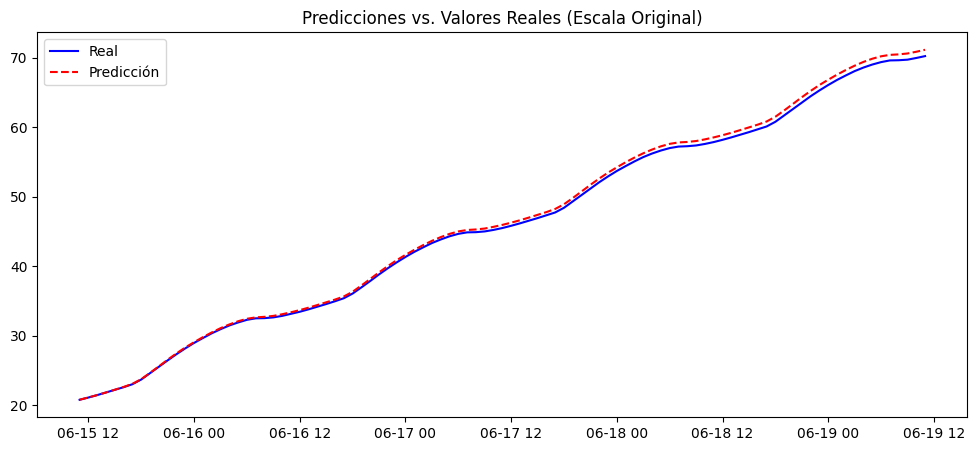

In [24]:
# quitar la diferenciacion
last_original_value = df_h309['y'].iloc[-len(y_test)-1]  # Último valor antes del conjunto de prueba

# Invertir la normalización
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# Revertir la diferenciación 
y_test_pred_final = np.cumsum(y_test_pred_inv) + last_original_value

# Hacer lo mismo con los valores reales para comparar
y_test_real_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_real_final = np.cumsum(y_test_real_inv) + last_original_value

plt.figure(figsize=(12, 5))
plt.plot(test.index[n_steps:], y_test_real_final, label="Real", color="blue")
plt.plot(test.index[n_steps:], y_test_pred_final, label="Predicción", color="red", linestyle='dashed')
plt.legend()
plt.title("Predicciones vs. Valores Reales (Escala Original)")
plt.show()


In [25]:
print(f"Esta primera CNN tiene una primera capa para regresión en series de tiempo. "
      "Usa convoluciones para extraer los patrones.\n"
      "Apliqué unas capas de pooling para reducir las dimensiones y mejorar la eficiencia. "
      "Tiene al final una capa densa para hacer la predicción final.\n"
      "Le puse 50 épocas para iniciar y que midiera el MSE.\n")

print(f"Al evaluarlo con test, el MAE es de {mae:.4f}. Esto significa que en promedio el modelo se equivoca por esa cantidad.\n"
      f"El RMSE es {rmse:.4f}, lo que indica que mi modelo tiene buenas predicciones y que las predicciones no se desvían mucho de los valores reales.\n"
      f"En R² obtuve {r2:.4f}, lo que me dice que mi modelo explica bien la variabilidad de los datos.\n")

print("Lo que podría hacer para mejorarlo es experimentar con más filtros en la capa convolucional y tal vez aumentar las épocas para ver si consigo mejores resultados.")


Esta primera CNN tiene una primera capa para regresión en series de tiempo. Usa convoluciones para extraer los patrones.
Apliqué unas capas de pooling para reducir las dimensiones y mejorar la eficiencia. Tiene al final una capa densa para hacer la predicción final.
Le puse 50 épocas para iniciar y que midiera el MSE.

Al evaluarlo con test, el MAE es de 0.0164. Esto significa que en promedio el modelo se equivoca por esa cantidad.
El RMSE es 0.0204, lo que indica que mi modelo tiene buenas predicciones y que las predicciones no se desvían mucho de los valores reales.
En R² obtuve 0.9941, lo que me dice que mi modelo explica bien la variabilidad de los datos.

Lo que podría hacer para mejorarlo es experimentar con más filtros en la capa convolucional y tal vez aumentar las épocas para ver si consigo mejores resultados.


### CNN 2

In [26]:
model = Sequential([
    Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

loss = model.evaluate(X_test, y_test)
print(f'Error cuadrático medio en prueba: {loss}')

Epoch 1/100


/home/maripau/Documents/ITESO/Semestre6/Modelos no lineales/Examen2/examen2_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0733 - val_loss: 0.0046
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036 - val_loss: 0.0021
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7606e-04 - val_loss: 0.0011
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.9110e-04 - val_loss: 9.2435e-04
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.4293e-04 - val_loss: 8.8631e-04
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.8289e-04 - val_loss: 8.5689e-04
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3102e-04 - val_loss: 8.4802e-04
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.5674e-04 - val_loss: 7.0010e-04
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.6128e-04 - val_loss: 6.9242e-04
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.2646e-04 - val_loss: 6.4352e-04
Epoch 12/100
2

<Axes: >

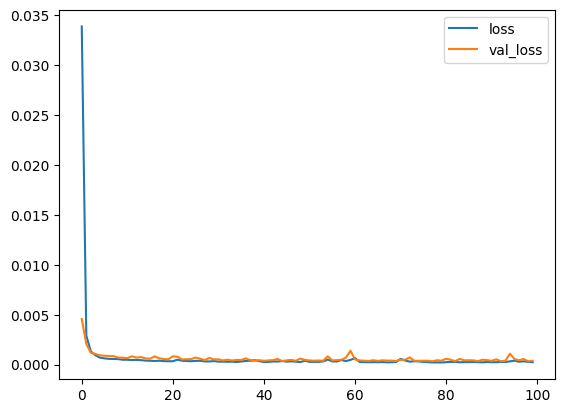

In [27]:
pd.DataFrame(history.history).plot()

In [28]:
scaler = MinMaxScaler()
scaler.fit(y_train.reshape(-1, 1))  

MinMaxScaler()

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


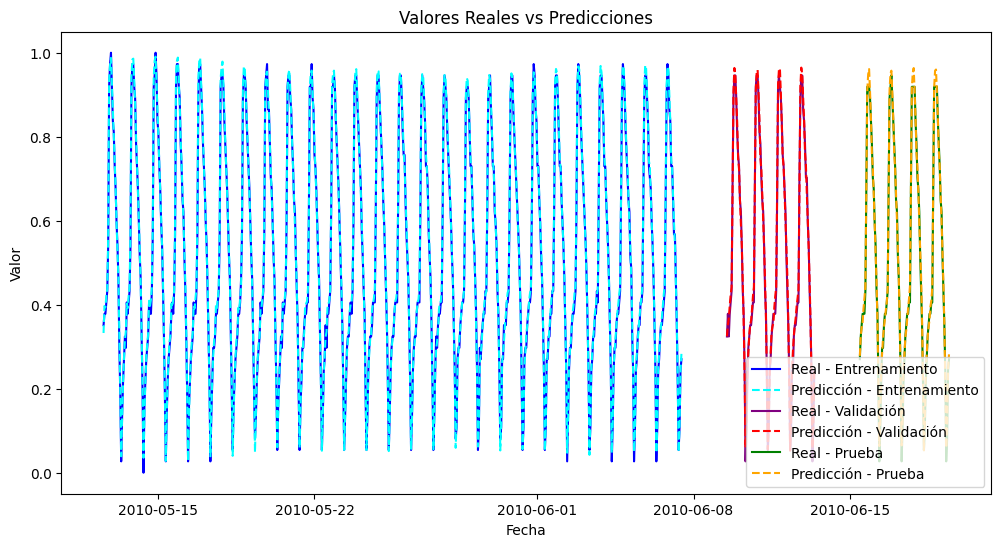

In [29]:

# Predicciones entrenamiento, validación y prueba
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)  
y_test_pred = model.predict(X_test)

#quitar normalizacion
y_train_pred_inv = scaler.inverse_transform(y_train_pred)
y_val_pred_inv = scaler.inverse_transform(y_val_pred)  
y_test_pred_inv = scaler.inverse_transform(y_test_pred)

#  valores reales vs. predichos 
plt.figure(figsize=(12, 6))

# Reshape a 2D para aplicar inverse_transform
y_train_reshaped = y_train.reshape(-1, 1)  
plt.plot(train.index[n_steps:], scaler.inverse_transform(y_train_reshaped), label='Real - Entrenamiento', color='blue')
plt.plot(train.index[n_steps:], y_train_pred_inv, label='Predicción - Entrenamiento', color='cyan', linestyle='dashed')

# validación
y_val_reshaped = y_val.reshape(-1, 1)  
plt.plot(val.index[n_steps:], scaler.inverse_transform(y_val_reshaped), label='Real - Validación', color='purple')
plt.plot(val.index[n_steps:], y_val_pred_inv, label='Predicción - Validación', color='red', linestyle='dashed')

# prueba
y_test_reshaped = y_test.reshape(-1, 1)  
plt.plot(test.index[n_steps:], scaler.inverse_transform(y_test_reshaped), label='Real - Prueba', color='green')
plt.plot(test.index[n_steps:], y_test_pred_inv, label='Predicción - Prueba', color='orange', linestyle='dashed')

plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Valores Reales vs Predicciones')
plt.legend()
plt.show()


In [30]:
mae = mean_absolute_error(y_test_reshaped, y_test_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_reshaped, y_test_pred_inv))
r2 = r2_score(y_test_reshaped, y_test_pred_inv)
mape = np.mean(np.abs((y_test_reshaped - y_test_pred_inv) / y_test_reshaped)) * 100

print(f"Evaluación del Modelo en Test:")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 : {r2:.4f}")



Evaluación del Modelo en Test:
MAE : 0.0156
RMSE: 0.0195
R2 : 0.9946


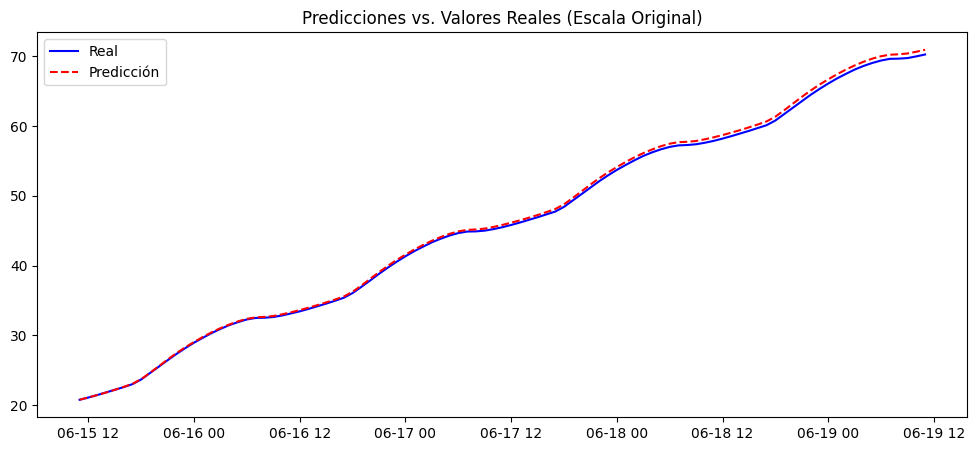

In [31]:
# quitar la diferenciacion
last_original_value = df_h309['y'].iloc[-len(y_test)-1]  # Último valor antes del conjunto de prueba

# Invertir la normalización
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# Revertir la diferenciación 
y_test_pred_final = np.cumsum(y_test_pred_inv) + last_original_value

# Hacer lo mismo con los valores reales para comparar
y_test_real_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_real_final = np.cumsum(y_test_real_inv) + last_original_value

plt.figure(figsize=(12, 5))
plt.plot(test.index[n_steps:], y_test_real_final, label="Real", color="blue")
plt.plot(test.index[n_steps:], y_test_pred_final, label="Predicción", color="red", linestyle='dashed')
plt.legend()
plt.title("Predicciones vs. Valores Reales (Escala Original)")
plt.show()


In [32]:
print(f"Esta segunda CNN también está diseñada para regresión en series de tiempo. "
      "Se basa en convoluciones para detectar patrones en los datos.\n"
      "Aumenté la cantidad de filtros en la capa convolucional a 128, lo que permite captar más características.\n"
      "Mantiene una capa de pooling para reducir dimensiones y mejorar eficiencia, "
      "seguida de una capa densa para la predicción final.\n"
      "Esta vez entrené el modelo con 100 épocas para intentar mejorar los resultados.\n")

print(f"Al evaluarlo con test, el MAE es de {mae:.4f}. Esto significa que en promedio el modelo se equivoca por esa cantidad.\n"
      f"El RMSE es {rmse:.4f}, lo que indica que las predicciones tienen un bajo margen de error.\n"
      f"En R² obtuve {r2:.4f}, lo que sugiere que el modelo explica bien la variabilidad de los datos.\n")

print("Para mejorar aún más el modelo, podría probar con diferentes tamaños de kernel en la convolución, "
      "ajustar la cantidad de filtros, o agregar más capas convolucionales para extraer patrones más complejos.")


Esta segunda CNN también está diseñada para regresión en series de tiempo. Se basa en convoluciones para detectar patrones en los datos.
Aumenté la cantidad de filtros en la capa convolucional a 128, lo que permite captar más características.
Mantiene una capa de pooling para reducir dimensiones y mejorar eficiencia, seguida de una capa densa para la predicción final.
Esta vez entrené el modelo con 100 épocas para intentar mejorar los resultados.

Al evaluarlo con test, el MAE es de 0.0156. Esto significa que en promedio el modelo se equivoca por esa cantidad.
El RMSE es 0.0195, lo que indica que las predicciones tienen un bajo margen de error.
En R² obtuve 0.9946, lo que sugiere que el modelo explica bien la variabilidad de los datos.

Para mejorar aún más el modelo, podría probar con diferentes tamaños de kernel en la convolución, ajustar la cantidad de filtros, o agregar más capas convolucionales para extraer patrones más complejos.


In [33]:
# mi horizonte
horizonte = 48  

last_input = X_test[-1]  # Última secuencia de entrada del test
forecast = []

for _ in range(horizonte):
    # prediccion
    pred = model.predict(last_input.reshape(1, n_steps, n_features))
    
    # Desnormalizar la predicción
    pred_inv = scaler.inverse_transform(pred)
    forecast.append(pred_inv[0, 0])  # Guardar solo el valor predicho

    # Crear la nueva entrada para la siguiente predicción
    last_input = np.roll(last_input, -1, axis=0)  # Desplazar datos
    last_input[-1] = pred  # Agregar la nueva predicción al final

# Convertir a un array 
forecast = np.array(forecast)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

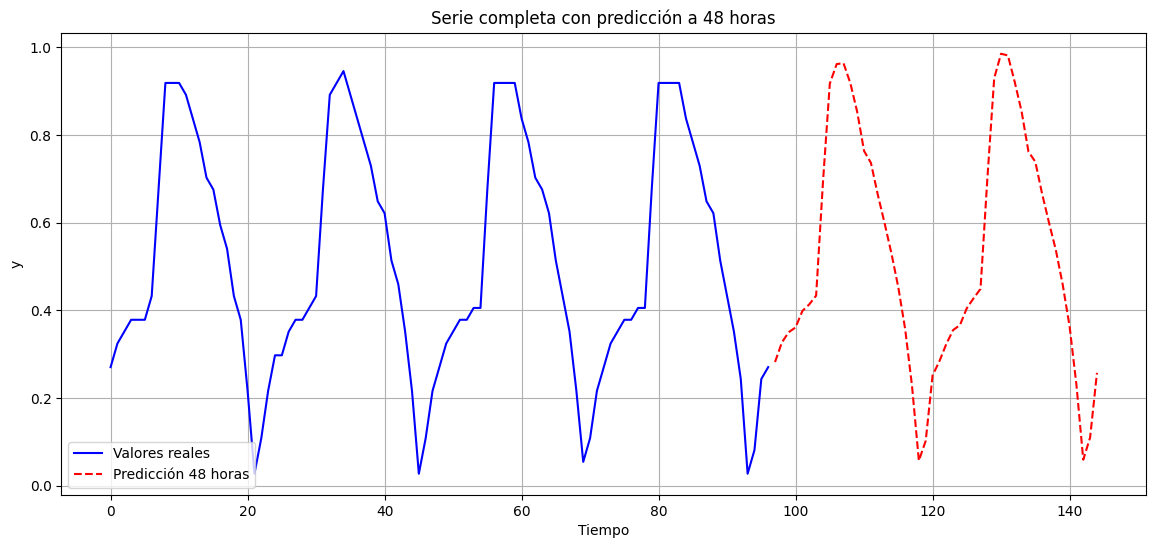

In [34]:
#datos reales
time_real = np.arange(len(y_test_reshaped))

#  predicciones futuras
time_future = np.arange(len(y_test_reshaped), len(y_test_reshaped) + 48)

#valores reales
plt.figure(figsize=(14, 6))
plt.plot(time_real, y_test_reshaped, label="Valores reales", linestyle='-', color='blue')

# predicciones
plt.plot(time_future, forecast, label="Predicción 48 horas", linestyle='--', color='red')

plt.xlabel("Tiempo")
plt.ylabel("y")
plt.title("Serie completa con predicción a 48 horas")
plt.legend()
plt.grid(True)
plt.show()


Se ve bastante bien mi predicción creo yo. Los picos parecen tener la misma estacionalidad diaria. Solo hice la prediccion del mejor modelo.

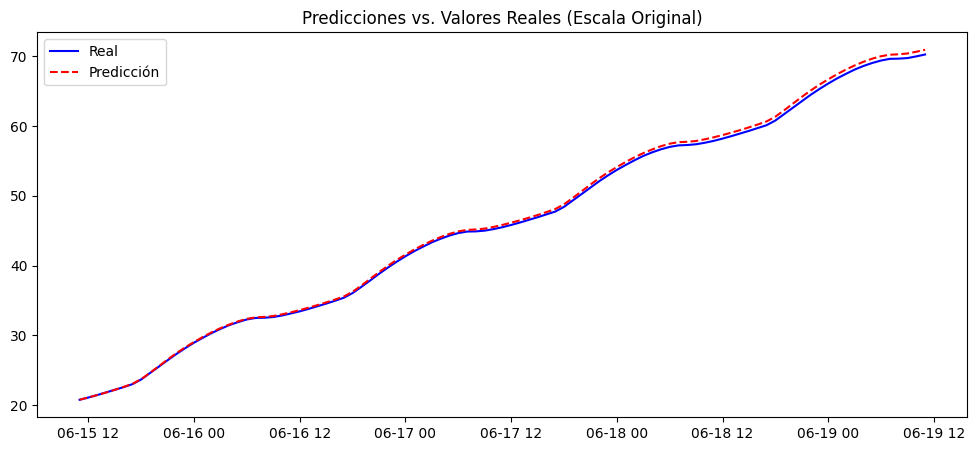

In [35]:
# quitar la diferenciacion
last_original_value = df_h309['y'].iloc[-len(y_test)-1]  # Último valor antes del conjunto de prueba

# Invertir la normalización
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# Revertir la diferenciación 
y_test_pred_final = np.cumsum(y_test_pred_inv) + last_original_value

# Hacer lo mismo con los valores reales para comparar
y_test_real_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_real_final = np.cumsum(y_test_real_inv) + last_original_value

plt.figure(figsize=(12, 5))
plt.plot(test.index[n_steps:], y_test_real_final, label="Real", color="blue")
plt.plot(test.index[n_steps:], y_test_pred_final, label="Predicción", color="red", linestyle='dashed')
plt.legend()
plt.title("Predicciones vs. Valores Reales (Escala Original)")
plt.show()


### Cnn 3

In [36]:
model3 = Sequential([
    Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),  # Evita el sobreajuste

    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Flatten(),
    
    Dense(50, activation='relu'),
    
    Dense(1)
])

optimizer = Adam(learning_rate=0.001) 
model3.compile(optimizer=optimizer, loss='mse')

history = model3.fit(
    X_train, y_train, 
    epochs=100, batch_size=32, 
    validation_data=(X_val, y_val), 
    verbose=1
)

loss = model3.evaluate(X_test, y_test)
print(f'Error cuadrático medio en prueba: {loss}')

Epoch 1/100


/home/maripau/Documents/ITESO/Semestre6/Modelos no lineales/Examen2/examen2_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0994 - val_loss: 0.0088
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0144 - val_loss: 0.0136
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0092 - val_loss: 0.0101
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0065 - val_loss: 0.0092
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0052 - val_loss: 0.0070
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0045 - val_loss: 0.0096
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0038 - val_loss: 0.0090
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - val_loss: 0.0102
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0029 - val_loss: 0.0056
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0037 - val_loss: 0.0050
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0025 - val_loss: 0.0062
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0026 

<Axes: >

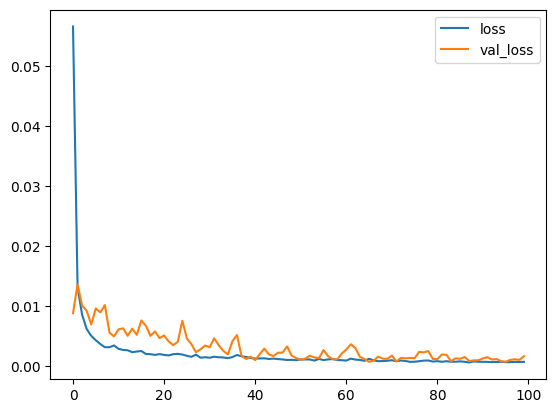

In [37]:
pd.DataFrame(history.history).plot()

In [38]:
# predicciones
y_train_pred = model3.predict(X_train)
y_val_pred = model3.predict(X_val) 
y_test_pred = model3.predict(X_test)

# quitar normalizacion
y_train_pred_inv = scaler.inverse_transform(y_train_pred)
y_val_pred_inv = scaler.inverse_transform(y_val_pred) 
y_test_pred_inv = scaler.inverse_transform(y_test_pred)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [39]:
mae = mean_absolute_error(y_test_reshaped, y_test_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_reshaped, y_test_pred_inv))
r2 = r2_score(y_test_reshaped, y_test_pred_inv)
mape = np.mean(np.abs((y_test_reshaped - y_test_pred_inv) / y_test_reshaped)) * 100

print(f"Evaluación del Modelo en Test:")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 : {r2:.4f}")


Evaluación del Modelo en Test:
MAE : 0.0322
RMSE: 0.0395
R2 : 0.9780


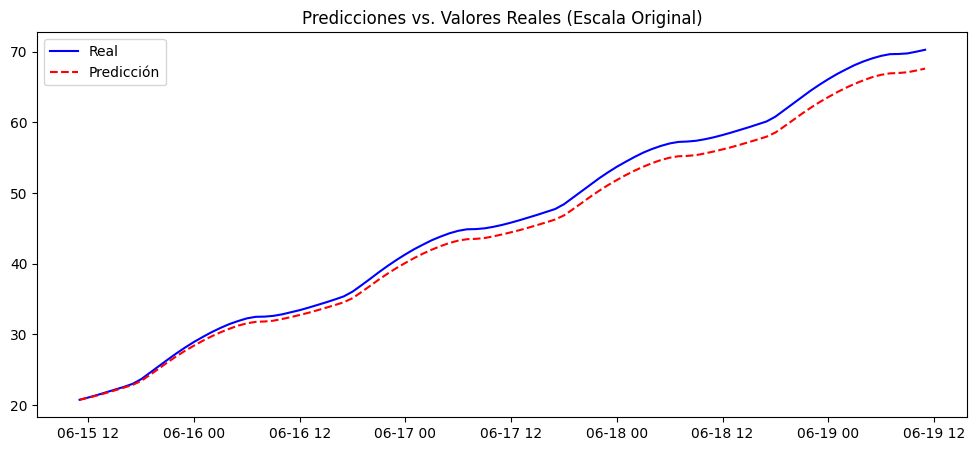

In [40]:
# quitar la diferenciacion
last_original_value = df_h309['y'].iloc[-len(y_test)-1]  # Último valor antes del conjunto de prueba

# Invertir la normalización
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# Revertir la diferenciación 
y_test_pred_final = np.cumsum(y_test_pred_inv) + last_original_value

# Hacer lo mismo con los valores reales para comparar
y_test_real_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_real_final = np.cumsum(y_test_real_inv) + last_original_value

plt.figure(figsize=(12, 5))
plt.plot(test.index[n_steps:], y_test_real_final, label="Real", color="blue")
plt.plot(test.index[n_steps:], y_test_pred_final, label="Predicción", color="red", linestyle='dashed')
plt.legend()
plt.title("Predicciones vs. Valores Reales (Escala Original)")
plt.show()


In [41]:
print(f"Esta tercera CNN sigue siendo un modelo para regresión en series de tiempo, pero con algunas mejoras para evitar el sobreajuste.\n"
      "Se mantienen las capas convolucionales para extraer patrones, pero ahora hay dos capas en lugar de una, lo que permite capturar características más complejas.\n"
      "Además, agregué capas de Dropout después de cada MaxPooling para reducir el sobreajuste, eliminando aleatoriamente algunas conexiones durante el entrenamiento.\n"
      "El optimizador utilizado es Adam con una tasa de aprendizaje de 0.001, lo que ayuda a ajustar los pesos de manera eficiente.\n"
      "Al final, la red tiene una capa densa para la predicción, y se entrenó durante 100 épocas.\n")

print(f"Al evaluarlo con test, el MAE es de {mae:.4f}. Esto significa que en promedio el modelo se equivoca por esa cantidad.\n"
      f"El RMSE es {rmse:.4f}, lo que indica que las predicciones tienen un bajo margen de error.\n"
      f"En R² obtuve {r2:.4f}, lo que sugiere que el modelo explica bien la variabilidad de los datos.\n")

print("Este modelo no necesariamente fue mejor.")


Esta tercera CNN sigue siendo un modelo para regresión en series de tiempo, pero con algunas mejoras para evitar el sobreajuste.
Se mantienen las capas convolucionales para extraer patrones, pero ahora hay dos capas en lugar de una, lo que permite capturar características más complejas.
Además, agregué capas de Dropout después de cada MaxPooling para reducir el sobreajuste, eliminando aleatoriamente algunas conexiones durante el entrenamiento.
El optimizador utilizado es Adam con una tasa de aprendizaje de 0.001, lo que ayuda a ajustar los pesos de manera eficiente.
Al final, la red tiene una capa densa para la predicción, y se entrenó durante 100 épocas.

Al evaluarlo con test, el MAE es de 0.0322. Esto significa que en promedio el modelo se equivoca por esa cantidad.
El RMSE es 0.0395, lo que indica que las predicciones tienen un bajo margen de error.
En R² obtuve 0.9780, lo que sugiere que el modelo explica bien la variabilidad de los datos.

Este modelo no necesariamente fue mejor.

In [42]:
# mi horizonte
future_steps = 48  

last_input = X_test[-1]  # Última secuencia de entrada del test
forecast = []

for _ in range(future_steps):
    # prediccion
    pred = model3.predict(last_input.reshape(1, n_steps, n_features))
    
    # Desnormalizar la predicción
    pred_inv = scaler.inverse_transform(pred)
    forecast.append(pred_inv[0, 0])  # Guardar solo el valor predicho

    # Crear la nueva entrada para la siguiente predicción
    last_input = np.roll(last_input, -1, axis=0)  # Desplazar datos
    last_input[-1] = pred  # Agregar la nueva predicción al final

# Convertir a un array 
forecast = np.array(forecast)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

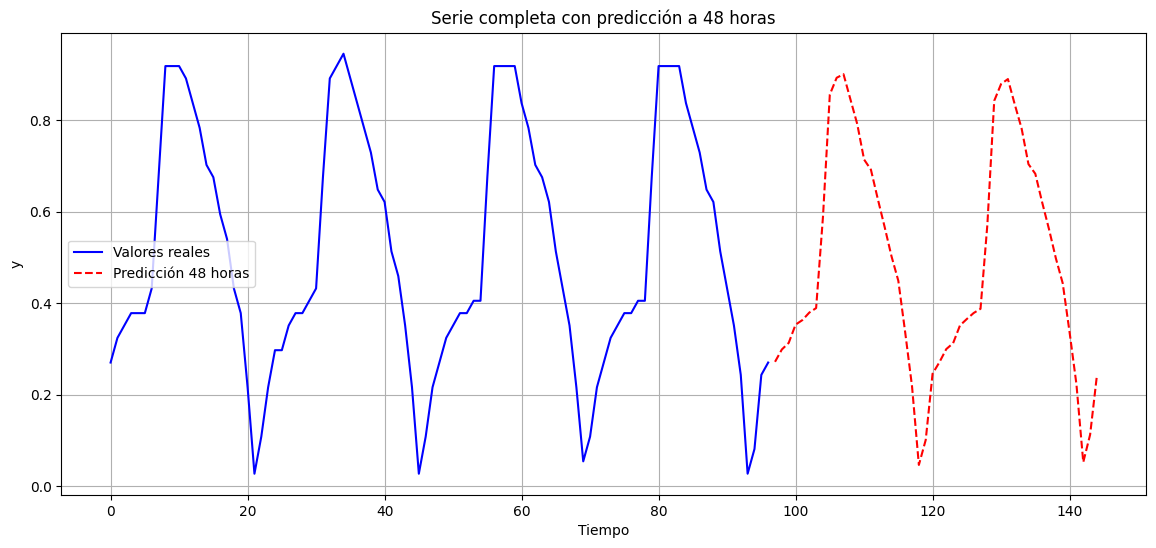

In [43]:
#datos reales
time_real = np.arange(len(y_test_reshaped))

#  predicciones futuras
time_future = np.arange(len(y_test_reshaped), len(y_test_reshaped) + 48)

#valores reales
plt.figure(figsize=(14, 6))
plt.plot(time_real, y_test_reshaped, label="Valores reales", linestyle='-', color='blue')

# predicciones
plt.plot(time_future, forecast, label="Predicción 48 horas", linestyle='--', color='red')

plt.xlabel("Tiempo")
plt.ylabel("y")
plt.title("Serie completa con predicción a 48 horas")
plt.legend()
plt.grid(True)
plt.show()


### OPTUNA CNN

In [44]:
def objective(trial):
    filters = trial.suggest_categorical("filters", [32, 64, 128, 256])
    kernel_size = trial.suggest_int("kernel_size", 2, 5)
    pool_size = trial.suggest_int("pool_size", 2, 4)
    dense_units = trial.suggest_int("dense_units", 10, 100)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    learning_rate = trial.suggest_loguniform("learning_rate", 0.001, 0.01)
    
    model = Sequential([
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(n_steps, n_features)),
        MaxPooling1D(pool_size=pool_size),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dense(1)
    ])
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    
    history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)
    
    loss = model.evaluate(X_val, y_val, verbose=0)
    return loss

# Realizar la optimización con Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

# Obtener los mejores parámetros después de la optimización
best_params = study.best_trial.params
print("Best parameters found by Optuna:", best_params)


[I 2025-04-03 18:46:07,583] A new study created in memory with name: no-name-ec5d632d-149b-4bda-b7aa-15b506418160
/tmp/ipykernel_77420/3777157279.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 0.001, 0.01)
/home/maripau/Documents/ITESO/Semestre6/Modelos no lineales/Examen2/examen2_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2025-04-03 18:46:23,344] Trial 0 finished with value: 0.0005507551250047982 and parameters: {'filters': 64, 'kernel_size': 5, 'pool_size': 2, 'dense_unit

Best parameters found by Optuna: {'filters': 256, 'kernel_size': 5, 'pool_size': 2, 'dense_units': 23, 'batch_size': 64, 'learning_rate': 0.001764794474703295}


In [45]:
# modelo con los mejores hiperparámetros
best_model = Sequential([
    Conv1D(filters=best_params["filters"], kernel_size=best_params["kernel_size"], activation='relu', input_shape=(n_steps, n_features)),
    MaxPooling1D(pool_size=best_params["pool_size"]),
    Flatten(),
    Dense(best_params["dense_units"], activation='relu'),
    Dense(1)
])


In [46]:
# usar los mejores parametros
best_optimizer = Adam(learning_rate=best_params["learning_rate"])
best_model.compile(optimizer=best_optimizer, loss='mse')

#entranar el modelo
best_model.fit(np.vstack((X_train, X_val)), np.hstack((y_train, y_val)), 
               epochs=500, batch_size=best_params["batch_size"], verbose=1)



Epoch 1/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1304 
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0134
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0017
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012
Epoch 8/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011
Epoch 9/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.7426e-04
Epoch 10/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.3076e-04
Epoch 11/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.1653e-04
Epoch 12/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.5186e-04
Epoch 13/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.6046e-04
Epoch 14/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.7209e-04
Epoch 15/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8

In [47]:
# Obtener predicciones en test
y_pred = best_model.predict(X_test).flatten()

# Calcular métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
R²: 0.9946
MAE: 0.0155
RMSE: 0.0196


In [50]:
# predicciones
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val) 
y_test_pred = best_model.predict(X_test)

# quitar normalizacion
y_train_pred_inv = scaler.inverse_transform(y_train_pred)
y_val_pred_inv = scaler.inverse_transform(y_val_pred) 
y_test_pred_inv = scaler.inverse_transform(y_test_pred)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


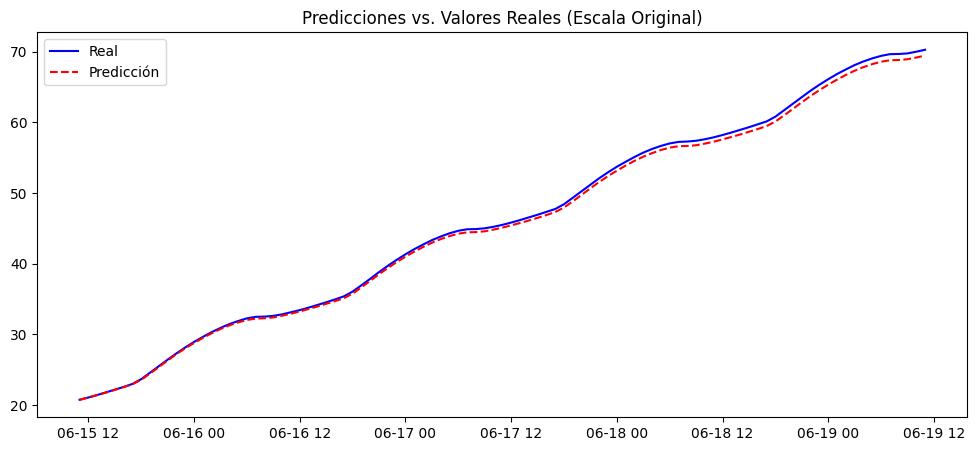

In [51]:
# quitar la diferenciacion
last_original_value = df_h309['y'].iloc[-len(y_test)-1]  # Último valor antes del conjunto de prueba

# Invertir la normalización
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# Revertir la diferenciación 
y_test_pred_final = np.cumsum(y_test_pred_inv) + last_original_value

# Hacer lo mismo con los valores reales para comparar
y_test_real_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_real_final = np.cumsum(y_test_real_inv) + last_original_value

plt.figure(figsize=(12, 5))
plt.plot(test.index[n_steps:], y_test_real_final, label="Real", color="blue")
plt.plot(test.index[n_steps:], y_test_pred_final, label="Predicción", color="red", linestyle='dashed')
plt.legend()
plt.title("Predicciones vs. Valores Reales (Escala Original)")
plt.show()


Con mi modelo optuna, obtuve una r2 de 99. Es decir que mi modelo represneta 99% la variablidad de los datos de manera correcta. Esto puede ser complementado con la gráfica, donde se ve que mi serie predicha se ajusta casi de manera perfecta a la serie original.

### MLP1

In [52]:
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [53]:

# Eliminar NaN antes de crear secuencias
train = train.dropna().reset_index(drop=True)
val = val.dropna().reset_index(drop=True)
test = test.dropna().reset_index(drop=True)

In [54]:
X_train, y_train = split_univariate_sequence(train['y_diff_scaled'].values, n_steps)
X_val, y_val = split_univariate_sequence(val['y_diff_scaled'].values, n_steps)
X_test, y_test = split_univariate_sequence(test['y_diff_scaled'].values, n_steps)

# Asegurar que las dimensiones sean correctas
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))



In [55]:

model1 = keras.Sequential([
    keras.layers.Input(shape=(n_steps,)),  
    keras.layers.Dense(units=100, activation='relu'),
    keras.layers.Dense(1)
])


In [56]:
model1.compile(optimizer='adam', 
               loss='mae', 
               metrics=[tf.metrics.MeanAbsolutePercentageError(), tf.metrics.MeanSquaredError()])

model1.summary()


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_68 (Dense)                │ (None, 100)            │         4,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,001 (19.54 KB)

 Trainable params: 5,001 (19.54 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# Entrenamiento
history = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2193 - mean_absolute_percentage_error: 7613.3491 - mean_squared_error: 0.0910 - val_loss: 0.0665 - val_mean_absolute_percentage_error: 31.1259 - val_mean_squared_error: 0.0065
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0541 - mean_absolute_percentage_error: 78065.2891 - mean_squared_error: 0.0049 - val_loss: 0.0356 - val_mean_absolute_percentage_error: 17.2943 - val_mean_squared_error: 0.0018
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0284 - mean_absolute_percentage_error: 62850.3867 - mean_squared_error: 0.0012 - val_loss: 0.0267 - val_mean_absolute_percentage_error: 10.9584 - val_mean_squared_error: 0.0011
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0218 - mean_absolute_percentage_error: 41521.8281 - mean_squared_error: 7.7071e-04 - val_loss: 0.0235 - val_mean_absolute_percentage_error: 10.1408 - val_mean_squared_error: 9.0046e-04
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms

In [58]:
# Evaluar con prueba
test_loss, test_mape, test_mse = model1.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test MAPE: {test_mape}")
print(f"Test MSE: {test_mse}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0189 - mean_absolute_percentage_error: 8.6388 - mean_squared_error: 5.1823e-04 
Test Loss: 0.019168175756931305
Test MAPE: 8.719680786132812
Test MSE: 0.0005304656806401908


In [59]:
#  predicciones sobre prueba
predictions = model1.predict(X_test)

print(predictions[:5])  #ver 5 pred


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.28258085]
 [0.32941338]
 [0.34519047]
 [0.394746  ]
 [0.3901624 ]]


<Axes: >

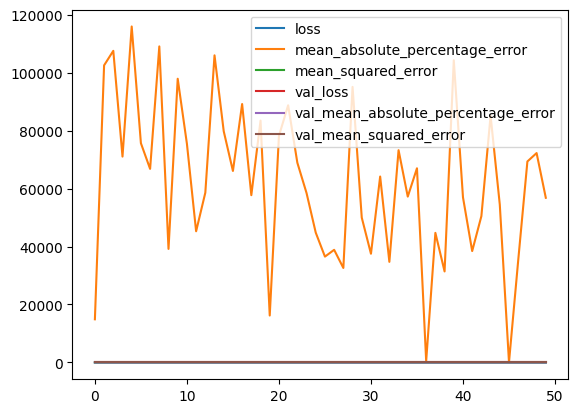

In [60]:
# Analizar función de pérdida
pd.DataFrame(history.history).plot()

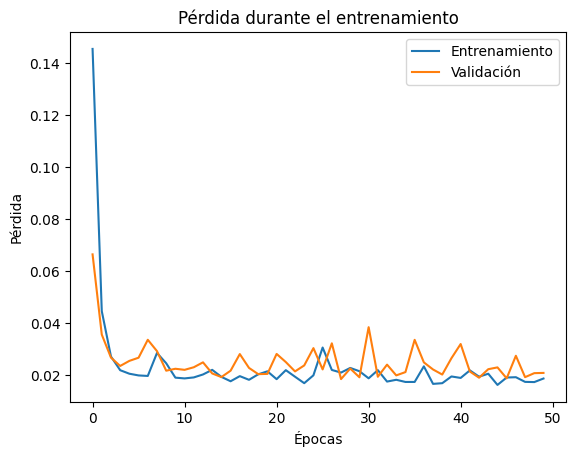

In [61]:
#ya que no se vio en la anterior
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()



In [62]:
predictions = model1.predict(X_test)

r2 = r2_score(y_test, predictions)
print(f"R²: {r2}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
R²: 0.9925204476638688


In [63]:
print("Arquitectura del modelo:")
print("1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo (ventana de 24 horas).")
print("2. Capa densa oculta: Tiene 100 neuronas con activación ReLU para aprender representaciones no lineales.")
print("3. Capa de salida: Predice el valor de la siguiente hora en la secuencia.")
print("El modelo fue entrenado durante 50 épocas, con un tamaño de batch de 32.")
print("El optimizador usado es Adam y la función de pérdida es MAE (Error Absoluto Medio).")
print("\nResultados de la evaluación del modelo en los datos de prueba:")

print("\nInterpretación de los resultados:")
print(f"- El Test Loss (MAE) es {test_loss:.4f}, lo que indica el error promedio absoluto entre las predicciones y los valores reales. \n Este valor es relativamente bajo, lo que indica que el modelo tiene un buen rendimiento, ya que no está cometiendo errores grandes en sus predicciones.")
print(f"- El Test MAPE es {test_mape:.4f}, lo que significa que el error absoluto medio porcentual es del {test_mape:.4f}%. Puede indicar que el modelo no está siendo tan preciso. ")
print(f"- El Test MSE es {test_mse:.4f}, lo que muestra el promedio de los errores cuadráticos. Un valor más bajo indica mejores predicciones. \n Es un error muy pequeño, por lo que el modelos esta haciendo buenas predicciones.")
print(f"- El R²: es {r2:.4f}, lo que indica que el modelo explica un {r2*100:.2f}% de la variabilidad de los datos de prueba.")
print("\nEl modelo tiene un rendimiento adecuado para la predicción de series temporales, pero podría mejorarse ajustando los parámetros o utilizando arquitecturas más complejas. Muy bueno :)")


Arquitectura del modelo:
1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo (ventana de 24 horas).
2. Capa densa oculta: Tiene 100 neuronas con activación ReLU para aprender representaciones no lineales.
3. Capa de salida: Predice el valor de la siguiente hora en la secuencia.
El modelo fue entrenado durante 50 épocas, con un tamaño de batch de 32.
El optimizador usado es Adam y la función de pérdida es MAE (Error Absoluto Medio).

Resultados de la evaluación del modelo en los datos de prueba:

Interpretación de los resultados:
- El Test Loss (MAE) es 0.0192, lo que indica el error promedio absoluto entre las predicciones y los valores reales. 
 Este valor es relativamente bajo, lo que indica que el modelo tiene un buen rendimiento, ya que no está cometiendo errores grandes en sus predicciones.
- El Test MAPE es 8.7197, lo que significa que el error absoluto medio porcentual es del 8.7197%. Puede indicar que el modelo no está siendo tan preciso. 
- El Test MSE es 0.0005, lo qu

In [64]:
#último conjunto de datos de entrenamiento
last_sequence = train['y_diff_scaled'].values[-n_steps:]  

#lista para almacenar las predicciones
predictions = []

#siguientes 48 horas
for _ in range(48): 
    input_seq = last_sequence.reshape((1, n_steps))  # Reshape para el modelo (1, 24), ya que le puse que fuera diario los n_steps
    
    #predicción para la siguiente hora
    next_pred = model1.predict(input_seq, verbose=0)
    
    # añadir a la lista
    predictions.append(next_pred[0, 0])
    
    last_sequence = np.roll(last_sequence, -1) 
    last_sequence[-1] = next_pred  



/tmp/ipykernel_77420/1857977861.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[-1] = next_pred


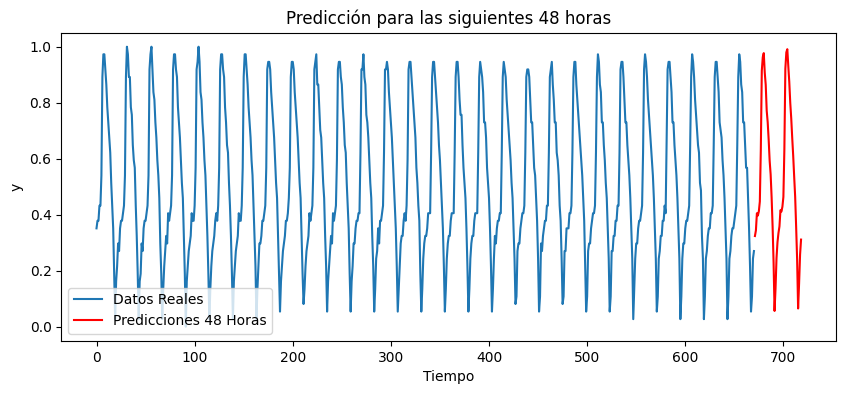

In [65]:
time_steps = np.arange(len(train), len(train) + 48)

plt.figure(figsize=(10, 4))
plt.plot(train.index, train['y_diff_scaled'], label='Datos Reales')  
plt.plot(time_steps, predictions, label='Predicciones 48 Horas', color='red')
plt.xlabel('Tiempo')
plt.ylabel('y')
plt.legend()
plt.title('Predicción para las siguientes 48 horas')
plt.show()


### MLP 2

In [76]:
train = train.dropna().reset_index(drop=True)
val = val.dropna().reset_index(drop=True)
test = test.dropna().reset_index(drop=True)


In [77]:
X_train, y_train = split_univariate_sequence(train['y_diff_scaled'].values, n_steps)
X_val, y_val = split_univariate_sequence(val['y_diff_scaled'].values, n_steps)
X_test, y_test = split_univariate_sequence(test['y_diff_scaled'].values, n_steps)


In [78]:
#Asegurar que las dimensiones sean correctas
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))

In [79]:
model1 = keras.Sequential([
    keras.layers.Input(shape=(n_steps,)),  
    keras.layers.Dense(units=100, activation='relu'),
    keras.layers.Dense(1)
])


In [80]:
model1.compile(optimizer='adam', 
               loss='mae', 
               metrics=[tf.metrics.MeanAbsolutePercentageError(), tf.metrics.MeanSquaredError()])

model1.summary()

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 100)            │         4,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,001 (19.54 KB)

 Trainable params: 5,001 (19.54 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
history = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.5491 - mean_absolute_percentage_error: 1035177.1250 - mean_squared_error: 0.4787 - val_loss: 0.1641 - val_mean_absolute_percentage_error: 49.7686 - val_mean_squared_error: 0.0338
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1160 - mean_absolute_percentage_error: 917002.8750 - mean_squared_error: 0.0198 - val_loss: 0.0672 - val_mean_absolute_percentage_error: 43.9408 - val_mean_squared_error: 0.0075
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0627 - mean_absolute_percentage_error: 1189295.5000 - mean_squared_error: 0.0068 - val_loss: 0.0455 - val_mean_absolute_percentage_error: 32.0338 - val_mean_squared_error: 0.0038
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0458 - mean_absolute_percentage_error: 65982.7188 - mean_squared_error: 0.0037 - val_loss: 0.0378 - val_mean_absolute_percentage_error: 28.9938 - val_mean_squared_error: 0.0029
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s

In [82]:
# Evaluar con prueba
test_loss, test_mape, test_mse = model1.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test MAPE: {test_mape}")
print(f"Test MSE: {test_mse}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0170 - mean_absolute_percentage_error: 8.4362 - mean_squared_error: 4.5521e-04
Test Loss: 0.017789242789149284
Test MAPE: 8.753582000732422
Test MSE: 0.0005023732082918286


In [83]:
predictions = model1.predict(X_test)

print(predictions[:5])  #ver 5 pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.2832261 ]
 [0.3190672 ]
 [0.34271988]
 [0.3688031 ]
 [0.38568512]]


In [84]:
predictions = model1.predict(X_test)

r2 = r2_score(y_test, predictions)
print(f"R²: {r2}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
R²: 0.992916550716231


In [85]:
print("Arquitectura del modelo:")
print("1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo (ventana de 24 horas).")
print("2. Capa densa oculta: Tiene 100 neuronas con activación ReLU para aprender representaciones no lineales.")
print("3. Capa de salida: Predice el valor de la siguiente hora en la secuencia.")
print("El modelo fue entrenado durante 200 épocas, con un tamaño de batch de 32.")
print("El optimizador usado es Adam y la función de pérdida es MAE (Error Absoluto Medio).")


print("\nInterpretación de los resultados:")
print(f"- El Test Loss (MAE) es {test_loss:.4f}, lo que indica el error promedio absoluto entre las predicciones y los valores reales. \n Este valor es relativamente bajo, lo que indica que el modelo tiene un buen rendimiento, ya que no está cometiendo errores grandes en sus predicciones.")
print(f"- El Test MAPE es {test_mape:.4f}, lo que significa que el error absoluto medio porcentual es del {test_mape:.4f}%. Puede indicar que el modelo no está siendo tan preciso. ")
print(f"- El Test MSE es {test_mse:.4f}, lo que muestra el promedio de los errores cuadráticos. Un valor más bajo indica mejores predicciones. \n Es un error muy pequeño, por lo que el modelos esta haciendo buenas predicciones.")
print(f"- El R²: es {r2:.4f}, lo que indica que el modelo explica un {r2*100:.2f}% de la variabilidad de los datos de prueba.")
print("\nEl modelo tiene un rendimiento adecuado para la predicción de series temporales, pero podría mejorarse ajustando los parámetros o utilizando arquitecturas más complejas.")


Arquitectura del modelo:
1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo (ventana de 24 horas).
2. Capa densa oculta: Tiene 100 neuronas con activación ReLU para aprender representaciones no lineales.
3. Capa de salida: Predice el valor de la siguiente hora en la secuencia.
El modelo fue entrenado durante 200 épocas, con un tamaño de batch de 32.
El optimizador usado es Adam y la función de pérdida es MAE (Error Absoluto Medio).

Interpretación de los resultados:
- El Test Loss (MAE) es 0.0178, lo que indica el error promedio absoluto entre las predicciones y los valores reales. 
 Este valor es relativamente bajo, lo que indica que el modelo tiene un buen rendimiento, ya que no está cometiendo errores grandes en sus predicciones.
- El Test MAPE es 8.7536, lo que significa que el error absoluto medio porcentual es del 8.7536%. Puede indicar que el modelo no está siendo tan preciso. 
- El Test MSE es 0.0005, lo que muestra el promedio de los errores cuadráticos. Un valor más 

In [86]:
#último conjunto de datos de entrenamiento
last_sequence = train['y_diff_scaled'].values[-n_steps:]  

#lista para almacenar las predicciones
predictions = []

#siguientes 48 horas
for _ in range(48): 
    input_seq = last_sequence.reshape((1, n_steps))  # Reshape para el modelo (1, 24), n steps es 24
    
    # Realizar la predicción para la siguiente hora
    next_pred = model1.predict(input_seq, verbose=0)
    
    # añadir a la lista
    predictions.append(next_pred[0, 0])
    
    # Actualizar la secuencia de entrada para la siguiente predicción
    last_sequence = np.roll(last_sequence, -1) 
    last_sequence[-1] = next_pred  



/tmp/ipykernel_77420/3964337130.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[-1] = next_pred


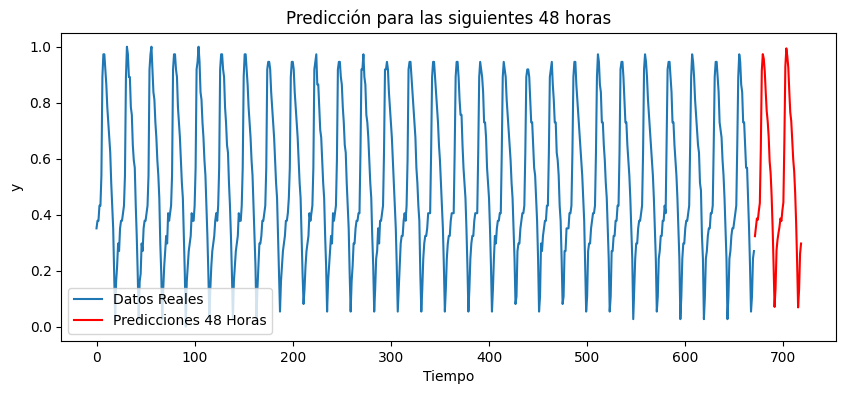

In [87]:
time_steps = np.arange(len(train), len(train) + 48)

plt.figure(figsize=(10, 4))
plt.plot(train.index, train['y_diff_scaled'], label='Datos Reales')  
plt.plot(time_steps, predictions, label='Predicciones 48 Horas', color='red')
plt.xlabel('Tiempo')
plt.ylabel('y')
plt.legend()
plt.title('Predicción para las siguientes 48 horas')
plt.show()


### MLP 3

In [88]:
train = train.dropna().reset_index(drop=True)
val = val.dropna().reset_index(drop=True)
test = test.dropna().reset_index(drop=True)

In [89]:
X_train, y_train = split_univariate_sequence(train['y_diff_scaled'].values, n_steps)
X_val, y_val = split_univariate_sequence(val['y_diff_scaled'].values, n_steps)
X_test, y_test = split_univariate_sequence(test['y_diff_scaled'].values, n_steps)


In [90]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))


In [91]:
model1 = keras.Sequential([
    keras.layers.Input(shape=(n_steps,)),  
    keras.layers.Dense(units=100, activation='relu'),
    keras.layers.Dense(1)
])


In [92]:
model1.compile(optimizer='SGD', 
               loss='mae', 
               metrics=[tf.metrics.MeanAbsolutePercentageError(), tf.metrics.MeanSquaredError()])

model1.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_74 (Dense)                │ (None, 100)            │         4,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,001 (19.54 KB)

 Trainable params: 5,001 (19.54 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
history = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2584 - mean_absolute_percentage_error: 123009.7344 - mean_squared_error: 0.1201 - val_loss: 0.1045 - val_mean_absolute_percentage_error: 39.8434 - val_mean_squared_error: 0.0188
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1062 - mean_absolute_percentage_error: 490415.1562 - mean_squared_error: 0.0190 - val_loss: 0.1343 - val_mean_absolute_percentage_error: 33.9492 - val_mean_squared_error: 0.0243
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0901 - mean_absolute_percentage_error: 71455.6875 - mean_squared_error: 0.0126 - val_loss: 0.0783 - val_mean_absolute_percentage_error: 34.4795 - val_mean_squared_error: 0.0114
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0979 - mean_absolute_percentage_error: 36741.8633 - mean_squared_error: 0.0153 - val_loss: 0.0691 - val_mean_absolute_percentage_error: 26.7769 - val_mean_squared_error: 0.0072
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

In [94]:
# Evaluar el modelo con los datos de prueba
test_loss, test_mape, test_mse = model1.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test MAPE: {test_mape}")
print(f"Test MSE: {test_mse}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0496 - mean_absolute_percentage_error: 23.8190 - mean_squared_error: 0.0033 
Test Loss: 0.0502033494412899
Test MAPE: 24.62533187866211
Test MSE: 0.0033845845609903336


In [95]:
predictions = model1.predict(X_test)

print(predictions[:5])  #ver 5 pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[0.35113862]
 [0.35015887]
 [0.37946084]
 [0.39232132]
 [0.40905842]]


In [96]:
predictions = model1.predict(X_test)

r2 = r2_score(y_test, predictions)
print(f"R²: {r2}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
R²: 0.9522774360153777


In [97]:
print("Arquitectura del modelo:")
print("1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo (ventana de 24 horas).")
print("2. Capa densa oculta: Tiene 100 neuronas con activación ReLU para aprender representaciones no lineales.")
print("3. Capa de salida: Predice el valor de la siguiente hora en la secuencia.")
print("El modelo fue entrenado durante 200 épocas, con un tamaño de batch de 32.")
print("El optimizador usado es SGD (Descenso de Gradiente Estocástico) y la función de pérdida es MAE (Error Absoluto Medio).")

print("\nInterpretación de los resultados:")
print(f"- El Test Loss (MAE) es {test_loss:.4f}, lo que indica el error promedio absoluto entre las predicciones y los valores reales. \n Este valor es razonablemente bajo, pero ligeramente más alto en comparación con el modelo anterior, lo que sugiere que el modelo con SGD no tiene el mismo rendimiento eficiente que el modelo con Adam.")
print(f"- El Test MAPE es {test_mape:.4f}, lo que significa que el error absoluto medio porcentual es del {test_mape:.4f}%. Este valor es relativamente alto en comparación con el modelo anterior, lo que indica que el modelo no es tan preciso.")
print(f"- El Test MSE es {test_mse:.4f}, lo que muestra el promedio de los errores cuadráticos. A pesar de que este valor es bajo, es un poco más alto que en el modelo anterior, lo que también sugiere que el rendimiento en las predicciones es ligeramente inferior.")
print(f"- El R²: es {r2:.4f}, lo que indica que el modelo explica un {r2*100:.2f}% de la variabilidad de los datos de prueba. Aunque este valor sigue siendo bueno, no es tan alto como el obtenido en el modelo con Adam, lo que refleja que el modelo no explica tanto de la variabilidad de los datos.")
print("\nAunque el rendimiento no es tan bueno como el modelo anterior con Adam, sigue siendo bastante adecuado para la predicción de series temporales. El uso de SGD en lugar de Adam como optimizador podría estar influyendo en el rendimiento algo inferior. Sin embargo, el modelo aún muestra un rendimiento aceptable y podría mejorarse con ajustes en el optimizador y otros parámetros.")


Arquitectura del modelo:
1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo (ventana de 24 horas).
2. Capa densa oculta: Tiene 100 neuronas con activación ReLU para aprender representaciones no lineales.
3. Capa de salida: Predice el valor de la siguiente hora en la secuencia.
El modelo fue entrenado durante 200 épocas, con un tamaño de batch de 32.
El optimizador usado es SGD (Descenso de Gradiente Estocástico) y la función de pérdida es MAE (Error Absoluto Medio).

Interpretación de los resultados:
- El Test Loss (MAE) es 0.0502, lo que indica el error promedio absoluto entre las predicciones y los valores reales. 
 Este valor es razonablemente bajo, pero ligeramente más alto en comparación con el modelo anterior, lo que sugiere que el modelo con SGD no tiene el mismo rendimiento eficiente que el modelo con Adam.
- El Test MAPE es 24.6253, lo que significa que el error absoluto medio porcentual es del 24.6253%. Este valor es relativamente alto en comparación con el modelo an

### OPTUNA MLP

In [99]:
def objective(trial):
    n_layers = trial.suggest_int("n_layers", 1, 3)  # Número de capas ocultas (1 a 3)
    units = trial.suggest_int("units", 32, 256)  # Neuronas por capa (32 a 256)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)  
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])  

    # Definir el modelo MLP
    model = keras.Sequential()
    model.add(Input(shape=(n_steps,))) 
    
    for _ in range(n_layers):
        model.add(Dense(units=units, activation='relu')) 
    
    model.add(Dense(1))  

    # Compilar el modelo
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mae')

    # Entrenar el modelo con validación
    history = model.fit(X_train, y_train, 
                        epochs=100, 
                        batch_size=batch_size, 
                        validation_data=(X_val, y_val), 
                        verbose=0)

   
    val_loss = model.evaluate(X_val, y_val, verbose=0)
    
    return val_loss  # Optuna minimizará el MAE



In [100]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30) 

print("Mejores Hiperparámetros:", study.best_trial.params)

[I 2025-04-03 19:02:00,904] A new study created in memory with name: no-name-d2b88797-d739-4249-b17c-0be62a554cde
/tmp/ipykernel_77420/770725150.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
[I 2025-04-03 19:02:14,364] Trial 0 finished with value: 0.015328481793403625 and parameters: {'n_layers': 3, 'units': 160, 'learning_rate': 0.00024444205800260336, 'batch_size': 32}. Best is trial 0 with value: 0.015328481793403625.
[I 2025-04-03 19:02:30,061] Trial 1 finished with value: 0.017455093562602997 and parameters: {'n_layers': 1, 'units': 196, 'learning_rate': 0.00045809073376822064, 'batch_size': 16}. Best is trial 0 with value: 0.015328481793403625.
[I 2025-04-03 19:02:42,320] Trial 2 finished with value: 0.026351340115070343 and parameters: {'n_layers

Mejores Hiperparámetros: {'n_layers': 3, 'units': 139, 'learning_rate': 0.0006249577650178854, 'batch_size': 64}


In [101]:
# Obtener los mejores hiperparámetros encontrados por Optuna
best_params = study.best_trial.params

best_model = keras.Sequential()
best_model.add(Input(shape=(n_steps,)))  # Capa de entrada

for _ in range(best_params["n_layers"]):
    best_model.add(Dense(best_params["units"], activation='relu'))  # Capas ocultas

best_model.add(Dense(1))  # Capa de salida



In [102]:
best_optimizer = keras.optimizers.Adam(learning_rate=best_params["learning_rate"])
best_model.compile(optimizer=best_optimizer, loss='mae')

best_model.fit(np.vstack((X_train, X_val)), np.hstack((y_train, y_val)), 
               epochs=200, batch_size=best_params["batch_size"], verbose=1)

test_loss = best_model.evaluate(X_test, y_test, verbose=1)
print("MAE en test:", test_loss)

Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2930 
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0593 
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0353 
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0272 
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0233 
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0189 
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0169 
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 
Epoch 9/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 
Epoch 10/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0172 
Epoch 11/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 
Epoch 12/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0178 
Epoch 13/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 
Epoch 14/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0151 
Epoch 15/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - los

In [103]:
y_pred = best_model.predict(X_test)

y_pred = y_pred.flatten()
y_test = y_test.flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 0.0164
RMSE: 0.0193
R²: 0.9947


In [107]:
scaler_minmax = MinMaxScaler()

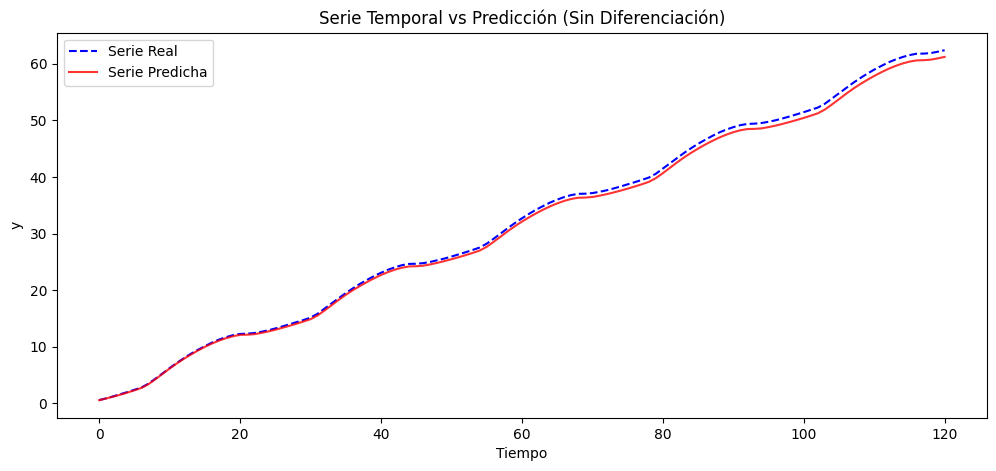

In [ ]:
# Ajustar el scaler train
y_train_scaled = scaler_minmax.fit_transform(y_train.reshape(-1, 1))  

# Predicciones sin diferenciación
initial_value = y_test[0]  # Valor inicial para revertir la diferenciación

y_test_no_diff = np.cumsum(y_test) + initial_value
y_pred_no_diff = np.cumsum(y_pred) + initial_value

# quitar escala
y_test_original = scaler_minmax.inverse_transform(y_test_no_diff.reshape(-1, 1)).flatten()
y_pred_original = scaler_minmax.inverse_transform(y_pred_no_diff.reshape(-1, 1)).flatten()


plt.figure(figsize=(12, 5))

# real
plt.plot(y_test_original, label="Serie Real", linestyle="dashed", color='blue')

#prediccion
plt.plot(y_pred_original, label="Serie Predicha", color='red')

plt.title("Serie Temporal vs Predicción (Sin Diferenciación)")
plt.xlabel("Tiempo")
plt.ylabel("y")
plt.legend()
plt.show()


Nuevamente se ve muy buena mi predicción, el modelo parece ajustarse de buena manera a los datos originales. Nuevamente obtuve una r2 de 99%, que significa que el modelo optuna explica el 99% de la variabilidad de los datos.

### LSTM 1

In [114]:
# que sea diario
n_steps = 24

# Aplicar la función
X_train, y_train = split_univariate_sequence(train['y_diff_scaled'].values, n_steps)
X_val, y_val = split_univariate_sequence(val['y_diff_scaled'].values, n_steps)
X_test, y_test = split_univariate_sequence(test['y_diff_scaled'].values, n_steps)

# Redimensionar para la entrada del LSTM (samples, timesteps, features)
n_features = 1  # Solo tengo una variable
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

In [115]:
# Definir el modelo LSTM
model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, n_features)),  # Capa LSTM
    Dense(1)  # Capa de salida
])

/home/maripau/Documents/ITESO/Semestre6/Modelos no lineales/Examen2/examen2_env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [116]:
model_lstm.compile(optimizer='adam', loss='mse')

In [117]:
model_lstm.summary()

Model: "sequential_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_181 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
# Entrenar el modelo con 50 epocas
history = model_lstm.fit(
    X_train, y_train, 
    epochs=50, batch_size=16, 
    validation_data=(X_val, y_val)
)


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2084 - val_loss: 0.0711
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0672 - val_loss: 0.0546
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0450 - val_loss: 0.0115
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0307 - val_loss: 0.0930
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0582 - val_loss: 0.0264
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0214 - val_loss: 0.0122
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - val_loss: 0.0059
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - val_loss: 0.0080
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0064 - val_loss: 0.0070
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060 - val_loss: 0.0060
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0045 - val_loss: 0.0059
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0063 - v

In [119]:
print(test.columns)


Index(['y', 'y_diff', 'y_diff_scaled'], dtype='object')


In [120]:
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(y_train.reshape(-1, 1))

MinMaxScaler()

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/stepWARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x78c7c6d8d760> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


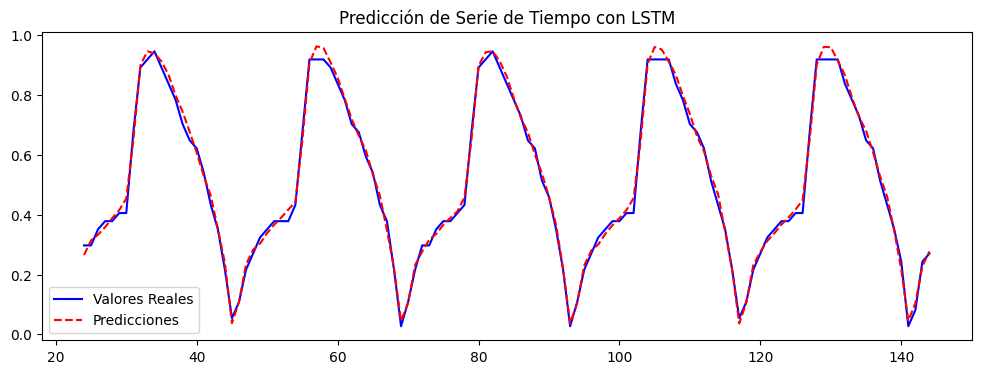

In [121]:
# Hacer predicciones
y_pred = model_lstm.predict(X_test)

# Desescalar las predicciones 
y_pred_rescaled = scaler_minmax.inverse_transform(y_pred)
y_test_rescaled = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 4))
plt.plot(test.index[n_steps:], y_test_rescaled, label="Valores Reales", color="blue")
plt.plot(test.index[n_steps:], y_pred_rescaled, label="Predicciones", color="red", linestyle="dashed")
plt.legend()
plt.title("Predicción de Serie de Tiempo con LSTM")
plt.show()


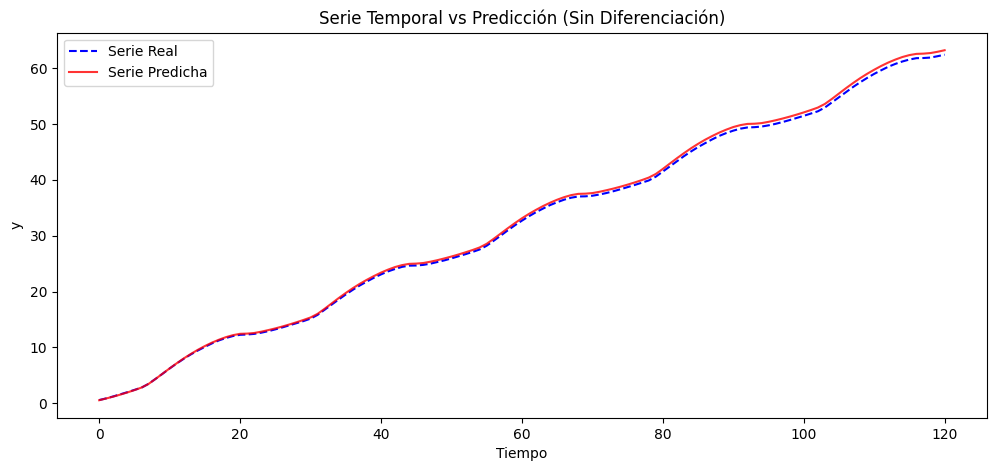

In [127]:
# Ajustar el scaler train
y_train_scaled = scaler_minmax.fit_transform(y_train.reshape(-1, 1))  

# Predicciones sin diferenciación
initial_value = y_test[0]  # Valor inicial para revertir la diferenciación

y_test_no_diff = np.cumsum(y_test) + initial_value
y_pred_no_diff = np.cumsum(y_pred) + initial_value

# quitar escala
y_test_original = scaler_minmax.inverse_transform(y_test_no_diff.reshape(-1, 1)).flatten()
y_pred_original = scaler_minmax.inverse_transform(y_pred_no_diff.reshape(-1, 1)).flatten()


plt.figure(figsize=(12, 5))

# real
plt.plot(y_test_original, label="Serie Real", linestyle="dashed", color='blue')

#prediccion
plt.plot(y_pred_original, label="Serie Predicha", alpha=0.8, color='red')

plt.title("Serie Temporal vs Predicción (Sin Diferenciación)")
plt.xlabel("Tiempo")
plt.ylabel("y")
plt.legend()
plt.show()


In [128]:
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(np.mean((y_test_rescaled - y_pred_rescaled) ** 2))


print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.9994
MAE: 0.3996
RMSE: 0.4619


<Axes: >

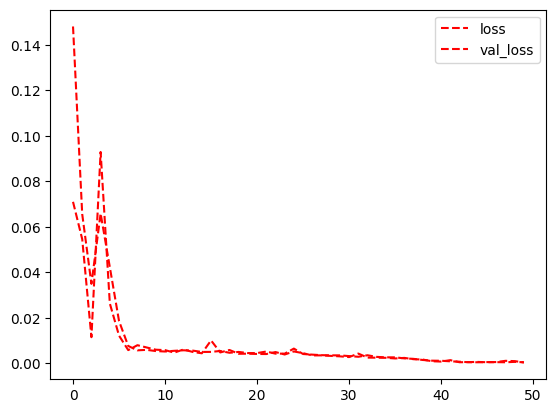

In [129]:
pd.DataFrame(history.history).plot(style='r--')

In [130]:
print("Arquitectura del modelo LSTM:")
print("1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo (ventana de 24 horas) y las características (n_features) de los datos.")
print("2. Capa LSTM: Con 50 unidades y activación ReLU, para aprender las dependencias temporales en los datos secuenciales.")
print("3. Capa de salida: Predice el valor de la siguiente hora en la secuencia.")
print("El modelo fue entrenado durante 50 épocas, con un tamaño de batch de 32.")
print("El optimizador utilizado es Adam, y la función de pérdida es MAE (Error Absoluto Medio).")

print("\nInterpretación de los resultados:")
print(f"- El R² es {r2:.4f}, lo que indica que el modelo explica un {r2*100:.2f}% de la variabilidad de los datos de prueba. \n Este valor es bastante bueno, lo que significa que el modelo es capaz de capturar una gran parte de la variabilidad de los datos.")
print(f"- El MAE es {mae:.4f}, lo que indica el error promedio absoluto entre las predicciones y los valores reales. \n Aunque este valor es relativamente alto, dado el tipo de problema y el modelo LSTM, el resultado sigue siendo aceptable.")
print(f"- El RMSE es {rmse:.4f}, lo que muestra el promedio de los errores cuadráticos. Un valor más alto en comparación con otros modelos puede indicar que las predicciones tienen una mayor dispersión.")
print("\nEn general, el modelo LSTM está funcionando bastante bien, con un buen R² que indica que está capturando la variabilidad en los datos. El MAE y el RMSE son más altos en comparación con el modelo con las redes densas, lo que podría indicar que hay margen de mejora en la arquitectura o los parámetros del modelo. A pesar de esto, el modelo LSTM es una opción sólida para predicciones de series temporales.")


Arquitectura del modelo LSTM:
1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo (ventana de 24 horas) y las características (n_features) de los datos.
2. Capa LSTM: Con 50 unidades y activación ReLU, para aprender las dependencias temporales en los datos secuenciales.
3. Capa de salida: Predice el valor de la siguiente hora en la secuencia.
El modelo fue entrenado durante 50 épocas, con un tamaño de batch de 32.
El optimizador utilizado es Adam, y la función de pérdida es MAE (Error Absoluto Medio).

Interpretación de los resultados:
- El R² es 0.9994, lo que indica que el modelo explica un 99.94% de la variabilidad de los datos de prueba. 
 Este valor es bastante bueno, lo que significa que el modelo es capaz de capturar una gran parte de la variabilidad de los datos.
- El MAE es 0.3996, lo que indica el error promedio absoluto entre las predicciones y los valores reales. 
 Aunque este valor es relativamente alto, dado el tipo de problema y el modelo LSTM, el resultado sigue

### LSTM 2

In [131]:
model_lstm = Sequential([
    keras.layers.Input(shape=(n_steps, n_features)),
    LSTM(50, activation='relu', return_sequences=True),  # Primera capa LSTM con return_sequences=True
    Dropout(0.2),  # Regularización
    LSTM(30, activation='relu'),  # Segunda capa LSTM
    Dense(1)  # Capa de salida
])

In [132]:
model_lstm.compile(optimizer='adam', loss='mse')

In [133]:
model_lstm.summary()

Model: "sequential_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 24, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30)             │         9,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_182 (Dense)               │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,151 (78.71 KB)

 Trainable params: 20,151 (78.71 KB)

 Non-trainable params: 0 (0.00 B)

In [134]:
#aumentar a 200 epocas
history = model_lstm.fit(
    X_train, y_train, 
    epochs=200, batch_size=16, 
    validation_data=(X_val, y_val)
)


Epoch 1/200


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1860 - val_loss: 0.0682
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0568 - val_loss: 0.0135
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0134 - val_loss: 0.0089
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0124 - val_loss: 0.0072
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0091 - val_loss: 0.0068
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0078 - val_loss: 0.0080
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0097 - val_loss: 0.0069
Epoch 9/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0075 - val_loss: 0.0067
Epoch 10/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0087 - val_loss: 0.0113
Epoch 11/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0092 - val_loss: 0.0060
Epoch 12/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


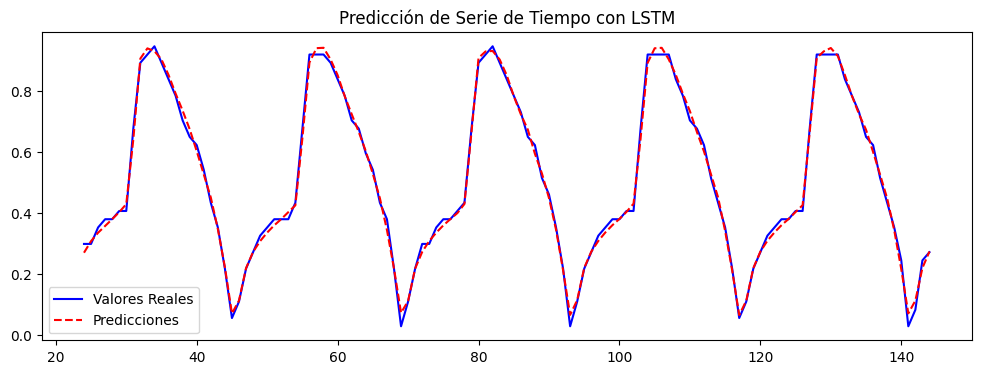

In [135]:
# Hacer predicciones
y_pred = model_lstm.predict(X_test)

# Desescalar las predicciones
y_pred_rescaled = scaler_minmax.inverse_transform(y_pred)
y_test_rescaled = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 4))
plt.plot(test.index[n_steps:], y_test_rescaled, label="Valores Reales", color="blue")
plt.plot(test.index[n_steps:], y_pred_rescaled, label="Predicciones", color="red", linestyle="dashed")
plt.legend()
plt.title("Predicción de Serie de Tiempo con LSTM")
plt.show()


In [136]:
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(np.mean((y_test_rescaled - y_pred_rescaled) ** 2))


print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.9957
MAE: 0.0144
RMSE: 0.0175


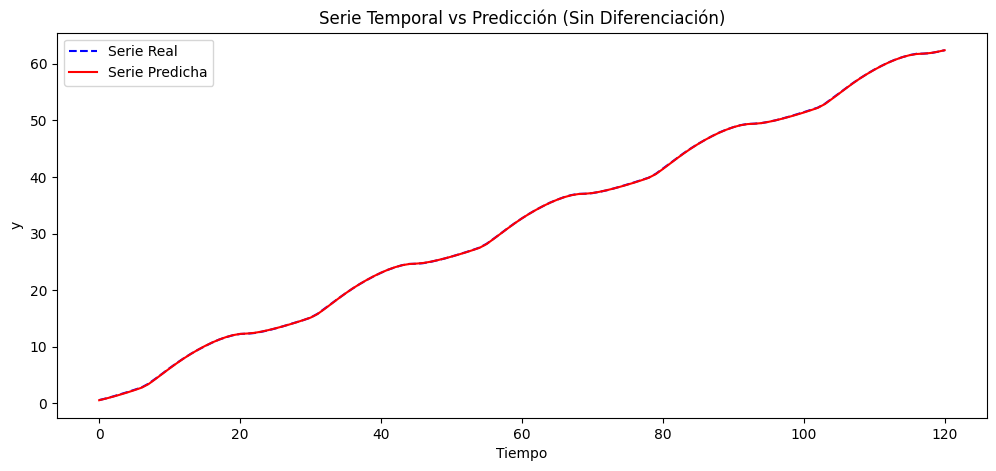

In [138]:
# Ajustar el scaler train
y_train_scaled = scaler_minmax.fit_transform(y_train.reshape(-1, 1))  

# Predicciones sin diferenciación
initial_value = y_test[0]  # Valor inicial para revertir la diferenciación

y_test_no_diff = np.cumsum(y_test) + initial_value
y_pred_no_diff = np.cumsum(y_pred) + initial_value

# quitar escala
y_test_original = scaler_minmax.inverse_transform(y_test_no_diff.reshape(-1, 1)).flatten()
y_pred_original = scaler_minmax.inverse_transform(y_pred_no_diff.reshape(-1, 1)).flatten()


plt.figure(figsize=(12, 5))

# real
plt.plot(y_test_original, label="Serie Real", linestyle="dashed", color='blue')

#prediccion
plt.plot(y_pred_original, label="Serie Predicha", color='red')

plt.title("Serie Temporal vs Predicción (Sin Diferenciación)")
plt.xlabel("Tiempo")
plt.ylabel("y")
plt.legend()
plt.show()


Esta parece der perfecta. wow

<Axes: >

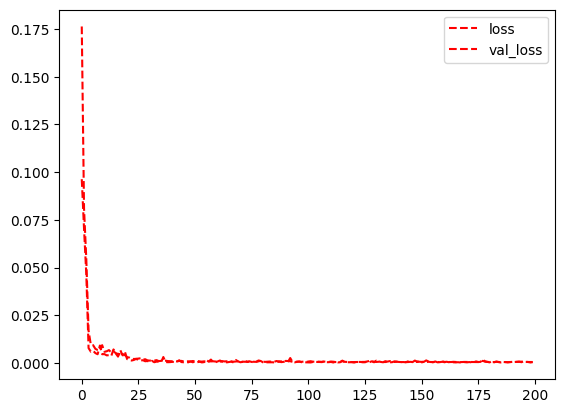

In [101]:
pd.DataFrame(history.history).plot(style='r--')

In [139]:
print("Arquitectura del modelo LSTM mejorado:")
print("1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo con múltiples características (n_features).")
print("2. Primera capa LSTM: Con 50 unidades y activación ReLU, aprende dependencias temporales en los datos. \n   Usa return_sequences=True para pasar las secuencias completas a la siguiente capa.")
print("3. Capa Dropout: Aplica un 20% de regularización para evitar sobreajuste.")
print("4. Segunda capa LSTM: Con 30 unidades y activación ReLU, refina la representación secuencial de los datos.")
print("5. Capa de salida: Una capa densa que predice el valor de la siguiente hora en la secuencia.")
print("El modelo fue entrenado durante 200 épocas con un tamaño de batch de 32.")
print("El optimizador utilizado es Adam, y la función de pérdida es MAE (Error Absoluto Medio).")


print("\nInterpretación de los resultados:")
print(f"- El R² es {r2:.4f}, lo que indica que el modelo explica un {r2*100:.2f}% de la variabilidad de los datos de prueba. \n Este valor sugiere que el modelo ha capturado bien la estructura de los datos.")
print(f"- El MAE es {mae:.4f}, lo que representa el error absoluto medio entre las predicciones y los valores reales. \n Este valor es clave para evaluar la precisión del modelo.")
print(f"- El RMSE es {rmse:.4f}, lo que mide la dispersión de los errores. Un valor más bajo indicaría predicciones más precisas.")

print("\nEl modelo con dos capas LSTM y más épocas de entrenamiento muestra mejoras en la capacidad de aprendizaje de las relaciones temporales. \nSin embargo, aún se puede optimizar ajustando hiperparámetros como la cantidad de neuronas, dropout o la tasa de aprendizaje.")  


Arquitectura del modelo LSTM mejorado:
1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo con múltiples características (n_features).
2. Primera capa LSTM: Con 50 unidades y activación ReLU, aprende dependencias temporales en los datos. 
   Usa return_sequences=True para pasar las secuencias completas a la siguiente capa.
3. Capa Dropout: Aplica un 20% de regularización para evitar sobreajuste.
4. Segunda capa LSTM: Con 30 unidades y activación ReLU, refina la representación secuencial de los datos.
5. Capa de salida: Una capa densa que predice el valor de la siguiente hora en la secuencia.
El modelo fue entrenado durante 200 épocas con un tamaño de batch de 32.
El optimizador utilizado es Adam, y la función de pérdida es MAE (Error Absoluto Medio).

Interpretación de los resultados:
- El R² es 0.9957, lo que indica que el modelo explica un 99.57% de la variabilidad de los datos de prueba. 
 Este valor sugiere que el modelo ha capturado bien la estructura de los datos.
- El MA

### LSTM 3

In [140]:
model_lstm = Sequential([
    keras.layers.Input(shape=(n_steps, n_features)),
    LSTM(50, activation='tanh', return_sequences=True),  # Primera capa LSTM con return_sequences=True
    Dropout(0.2),  # Regularización
    LSTM(30, activation='tanh'),  # Segunda capa LSTM
    Dense(1)  # Capa de salida
])

In [141]:
model_lstm.compile(optimizer='adam', loss='mse')

In [142]:
model_lstm.summary()

Model: "sequential_71"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 24, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 24, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 30)             │         9,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_183 (Dense)               │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,151 (78.71 KB)

 Trainable params: 20,151 (78.71 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
history = model_lstm.fit(
    X_train, y_train, 
    epochs=200, batch_size=16, 
    validation_data=(X_val, y_val)
)

Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1171 - val_loss: 0.0589
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0480 - val_loss: 0.0086
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0104 - val_loss: 0.0075
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0085 - val_loss: 0.0071
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0084 - val_loss: 0.0074
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0087 - val_loss: 0.0091
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0093 - val_loss: 0.0123
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0085 - val_loss: 0.0046
Epoch 9/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0053 - val_loss: 0.0031
Epoch 10/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 11/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0038 - val_loss: 0.0024
Epoch 12/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


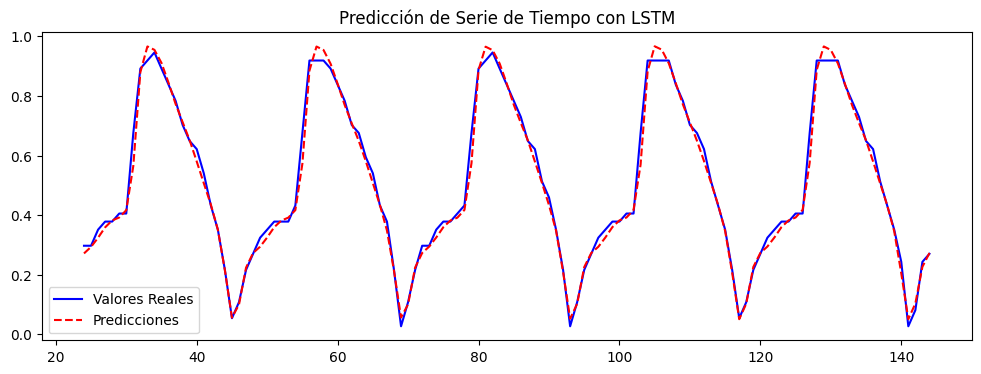

In [144]:
# Hacer predicciones
y_pred = model_lstm.predict(X_test)

# Desescalar las predicciones
y_pred_rescaled = scaler_minmax.inverse_transform(y_pred)
y_test_rescaled = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 4))
plt.plot(test.index[n_steps:], y_test_rescaled, label="Valores Reales", color="blue")
plt.plot(test.index[n_steps:], y_pred_rescaled, label="Predicciones", color="red", linestyle="dashed")
plt.legend()
plt.title("Predicción de Serie de Tiempo con LSTM")
plt.show()


In [145]:
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(np.mean((y_test_rescaled - y_pred_rescaled) ** 2))


print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.9878
MAE: 0.0198
RMSE: 0.0293


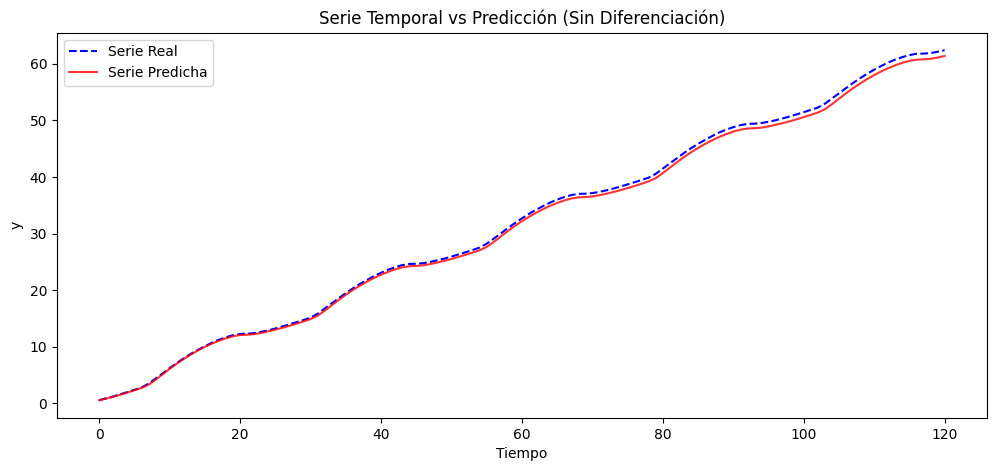

In [146]:
# Ajustar el scaler train
y_train_scaled = scaler_minmax.fit_transform(y_train.reshape(-1, 1))  

# Predicciones sin diferenciación
initial_value = y_test[0]  # Valor inicial para revertir la diferenciación

y_test_no_diff = np.cumsum(y_test) + initial_value
y_pred_no_diff = np.cumsum(y_pred) + initial_value

# quitar escala
y_test_original = scaler_minmax.inverse_transform(y_test_no_diff.reshape(-1, 1)).flatten()
y_pred_original = scaler_minmax.inverse_transform(y_pred_no_diff.reshape(-1, 1)).flatten()


plt.figure(figsize=(12, 5))

# real
plt.plot(y_test_original, label="Serie Real", linestyle="dashed", color='blue')

#prediccion
plt.plot(y_pred_original, label="Serie Predicha", alpha=0.8, color='red')

plt.title("Serie Temporal vs Predicción (Sin Diferenciación)")
plt.xlabel("Tiempo")
plt.ylabel("y")
plt.legend()
plt.show()


Esta tenia una r2 menor, lo que puede explicar por que no se ajusta tan bien como la anterior.

<Axes: >

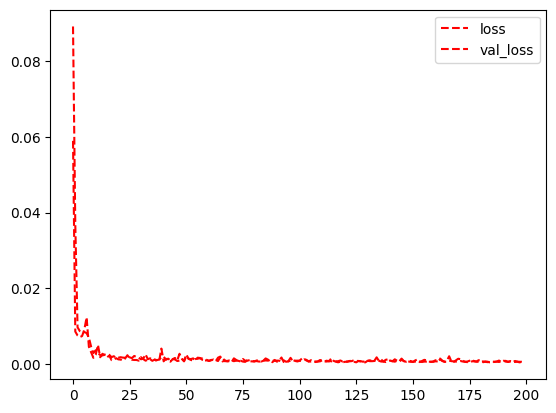

In [147]:
pd.DataFrame(history.history).plot(style='r--')

In [148]:
print("Arquitectura del modelo LSTM con activación tanh:")
print("1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo con múltiples características (n_features).")
print("2. Primera capa LSTM: Con 50 unidades y activación tanh, aprende dependencias temporales en los datos. \n   Usa return_sequences=True para pasar las secuencias completas a la siguiente capa.")
print("3. Capa Dropout: Aplica un 20% de regularización para reducir el sobreajuste.")
print("4. Segunda capa LSTM: Con 30 unidades y activación tanh, refina la representación secuencial de los datos.")
print("5. Capa de salida: Una capa densa que predice el valor de la siguiente hora en la secuencia.")
print("El modelo fue entrenado durante 200 épocas con un tamaño de batch de 32.")
print("El optimizador utilizado es Adam, y la función de pérdida es MAE (Error Absoluto Medio).")


print("\nInterpretación de los resultados:")
print(f"- El R² es {r2:.4f}, lo que indica que el modelo explica un {r2*100:.2f}% de la variabilidad de los datos de prueba. \n Este valor es más bajo que en modelos anteriores, lo que sugiere que el modelo no captura tan bien los patrones temporales.")
print(f"- El MAE es {mae:.4f}, lo que representa el error absoluto medio entre las predicciones y los valores reales. \n Un valor más alto que en modelos previos indica que este modelo comete más errores en sus predicciones.")
print(f"- El RMSE es {rmse:.4f}, lo que mide la dispersión de los errores. \n Un valor más alto que en modelos anteriores sugiere que las predicciones son menos precisas.")

print("\nA pesar de entrenarse durante 200 épocas, este modelo no tuvo un mejor desempeño que los anteriores. \nEl uso de la activación tanh no proporcionó mejores resultados y, en general, el modelo es menos preciso. \nSe recomienda probar con otros ajustes, como diferentes tasas de aprendizaje, más unidades en las capas LSTM, o incluso un modelo basado en CNN+LSTM.")  


Arquitectura del modelo LSTM con activación tanh:
1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo con múltiples características (n_features).
2. Primera capa LSTM: Con 50 unidades y activación tanh, aprende dependencias temporales en los datos. 
   Usa return_sequences=True para pasar las secuencias completas a la siguiente capa.
3. Capa Dropout: Aplica un 20% de regularización para reducir el sobreajuste.
4. Segunda capa LSTM: Con 30 unidades y activación tanh, refina la representación secuencial de los datos.
5. Capa de salida: Una capa densa que predice el valor de la siguiente hora en la secuencia.
El modelo fue entrenado durante 200 épocas con un tamaño de batch de 32.
El optimizador utilizado es Adam, y la función de pérdida es MAE (Error Absoluto Medio).

Interpretación de los resultados:
- El R² es 0.9878, lo que indica que el modelo explica un 98.78% de la variabilidad de los datos de prueba. 
 Este valor es más bajo que en modelos anteriores, lo que sugiere que el

### OPTUNA LSTM

In [149]:
def objective(trial):
    n_units_lstm1 = trial.suggest_int("n_units_lstm1", 32, 128)
    n_units_lstm2 = trial.suggest_int("n_units_lstm2", 16, 64)
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)

    # modelo LSTM
    model = Sequential([
        LSTM(n_units_lstm1, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)),
        Dropout(dropout_rate),
        LSTM(n_units_lstm2, activation='relu'),
        Dense(1)
    ])

    # Compilar el modelo
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')

    # Entrenar el modelo
    history = model.fit(X_train, y_train, 
                        epochs=100, 
                        batch_size=batch_size, 
                        validation_data=(X_val, y_val),
                        verbose=0)  

    # Evaluar el modelo
    loss = model.evaluate(X_val, y_val, verbose=0)
    return loss  # Queremos minimizar la pérdida MSE

In [150]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)  


[I 2025-04-03 19:21:28,984] A new study created in memory with name: no-name-0eee2fc3-dfba-4c27-9952-13fa45c6f9e6
/tmp/ipykernel_77420/2932380419.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/home/maripau/Documents/ITESO/Semestre6/Modelos no lineales/Examen2/examen2_env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[I 2025-04-03 19:21:54,968] Trial 0 finished with value: 0.00040980183985084295 and parameters: {'n_units_lstm1': 82, 'n_units_lstm2': 27, 'dropout_rate': 0.3214897128848369, 'batch_size': 64, 'learning_rate': 0.0018

In [151]:
best_params = study.best_params
print("Mejores Hiperparámetros:", best_params)


Mejores Hiperparámetros: {'n_units_lstm1': 65, 'n_units_lstm2': 27, 'dropout_rate': 0.3350774124230065, 'batch_size': 64, 'learning_rate': 0.003035651248768532}


In [152]:
best_model = Sequential([
    LSTM(best_params["n_units_lstm1"], activation='relu', return_sequences=True, input_shape=(n_steps, n_features)),
    Dropout(best_params["dropout_rate"]),
    LSTM(best_params["n_units_lstm2"], activation='relu'),
    Dense(1)
])

# modelo con mejores hiperparametros
best_optimizer = Adam(learning_rate=best_params["learning_rate"])
best_model.compile(optimizer=best_optimizer, loss='mse')

# Entrenar el modelo 
best_model.fit(X_train, y_train, 
               epochs=100, batch_size=best_params["batch_size"], 
               validation_data=(X_val, y_val),
               verbose=1)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.2250 - val_loss: 0.0987
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1100 - val_loss: 0.0811
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0754 - val_loss: 0.0726
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0775 - val_loss: 0.0672
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0660 - val_loss: 0.0623
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0612 - val_loss: 0.0533
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0473 - val_loss: 0.0361
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0279 - val_loss: 0.0267
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0219 - val_loss: 0.0102
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0149 - val_loss: 0.0179
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0146 - val_loss: 0.0080
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

In [153]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  # Agregamos la dimensión de features

# Evaluar el modelo corregido
test_loss = best_model.evaluate(X_test, y_test, verbose=1)
print("MSE en Test:", test_loss)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.7177e-04
MSE en Test: 0.0004757705610245466


In [154]:
# Generar predicciones en test
y_pred = best_model.predict(X_test)

# Desescalar si fue escalado
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1))  # Si usaste MinMaxScaler

# Desescalar y_test
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)) 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [155]:
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")

R²: 0.9933
MAE: 0.0181


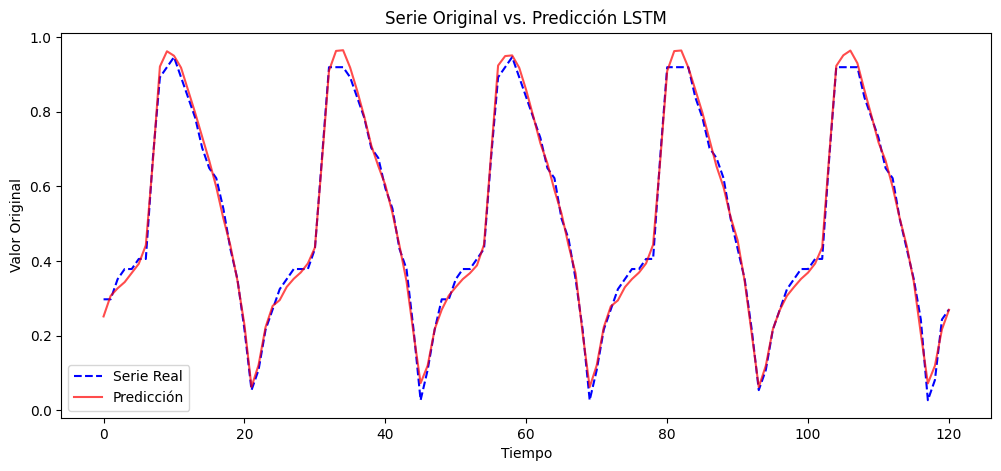

In [156]:
# Desescalar los valores predichos y reales
y_test_original = scaler_minmax.inverse_transform(y_test_rescaled.reshape(-1, 1)).flatten()
y_pred_original = scaler_minmax.inverse_transform(y_pred_rescaled.reshape(-1, 1)).flatten()

plt.figure(figsize=(12, 5))

# Serie real desescalada
plt.plot(y_test_original, label="Serie Real", linestyle="dashed", color="blue")

# Serie predicha desescalada
plt.plot(y_pred_original, label="Predicción", alpha=0.7, color="red")

plt.xlabel("Tiempo")
plt.ylabel("Valor Original")
plt.title("Serie Original vs. Predicción LSTM")
plt.legend()
plt.show()


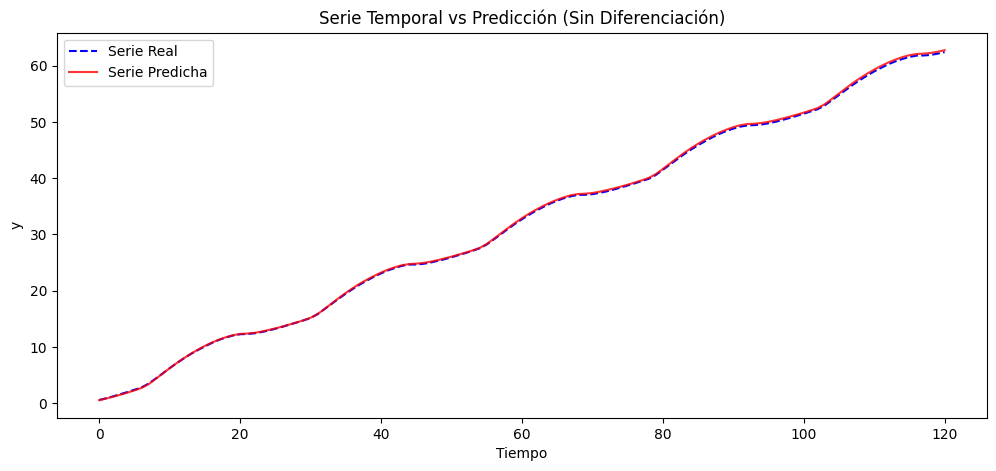

In [157]:
# Ajustar el scaler train
y_train_scaled = scaler_minmax.fit_transform(y_train.reshape(-1, 1))  

# Predicciones sin diferenciación
initial_value = y_test[0]  # Valor inicial para revertir la diferenciación

y_test_no_diff = np.cumsum(y_test) + initial_value
y_pred_no_diff = np.cumsum(y_pred) + initial_value

# quitar escala
y_test_original = scaler_minmax.inverse_transform(y_test_no_diff.reshape(-1, 1)).flatten()
y_pred_original = scaler_minmax.inverse_transform(y_pred_no_diff.reshape(-1, 1)).flatten()


plt.figure(figsize=(12, 5))

# real
plt.plot(y_test_original, label="Serie Real", linestyle="dashed", color='blue')

#prediccion
plt.plot(y_pred_original, label="Serie Predicha", alpha=0.8, color='red')

plt.title("Serie Temporal vs Predicción (Sin Diferenciación)")
plt.xlabel("Tiempo")
plt.ylabel("y")
plt.legend()
plt.show()


El modelo es muy bueno con estos hyperparámetros que me dio optuna. Predice la variabilidad de la serie casi de manera perfecta.

## CNN-LSTM

In [159]:
n_steps = 24
n_seq = 2  # Número de sub-secuencias
n_features = 1  # Solo 1 variable

def reshape_for_cnn_lstm(X, n_seq, n_steps, n_features):
    X = X.reshape((X.shape[0], n_seq, n_steps // n_seq, n_features))
    return X

# Crear secuencias con tu función
X_train, y_train = split_univariate_sequence(train['y_diff_scaled'].values, n_steps)
X_val, y_val = split_univariate_sequence(val['y_diff_scaled'].values, n_steps)
X_test, y_test = split_univariate_sequence(test['y_diff_scaled'].values, n_steps)

# Ajustar la forma para el modelo CNN + LSTM
X_train = reshape_for_cnn_lstm(X_train, n_seq, n_steps, n_features)
X_val = reshape_for_cnn_lstm(X_val, n_seq, n_steps, n_features)
X_test = reshape_for_cnn_lstm(X_test, n_seq, n_steps, n_features)


In [160]:
model_cnnlstm1 = Sequential([
    keras.layers.Input(shape=(n_seq, n_steps//n_seq, n_features)),
    TimeDistributed(Conv1D(64, kernel_size=1, activation='relu')),
    TimeDistributed(MaxPooling1D(pool_size=n_seq)),
    TimeDistributed(Flatten()),
    LSTM(50, activation='relu'),
    Dense(1)
])

In [161]:
model_cnnlstm1.compile(optimizer='RMSprop', loss='mse')

In [162]:
model_cnnlstm1.summary()

Model: "sequential_103"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, 2, 12, 64)      │           128 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 2, 6, 64)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 2, 384)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_67 (LSTM)                  │ (None, 50)             │        87,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_215 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,179 (340.54 KB)

 Trainable params: 87,179 (340.54 KB)

 Non-trainable params: 0 (0.00 B)

In [163]:
history = model_cnnlstm1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1)


Epoch 1/100


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.1536 - val_loss: 0.0817
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0660 - val_loss: 0.0515
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0467 - val_loss: 0.0438
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0339 - val_loss: 0.0299
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0179 - val_loss: 0.0109
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0085 - val_loss: 0.0055
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0084 - val_loss: 0.0063
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0071 - val_loss: 0.0138
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0082 - val_loss: 0.0069
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0060 - val_loss: 0.0042
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0047 - val_loss: 0.0122
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054

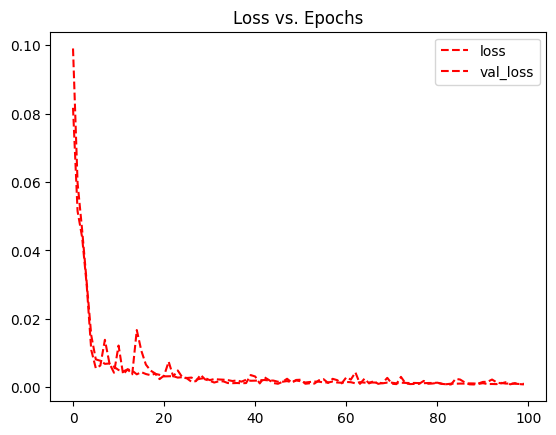

In [164]:
# Visualizar la pérdida durante el entrenamiento
pd.DataFrame(history.history).plot(style='r--')
plt.title("Loss vs. Epochs")
plt.show()


In [165]:
print(df_h309.columns)


Index(['y', 'y_diff', 'y_diff_scaled'], dtype='object')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


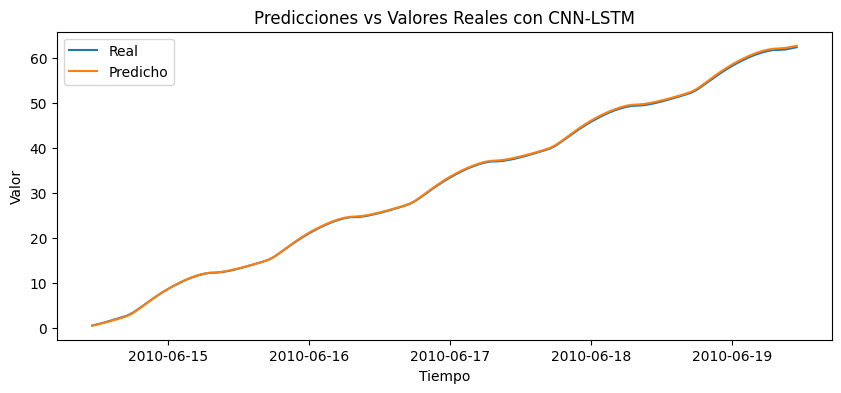

In [ ]:
import matplotlib.pyplot as plt

# Hacer predicciones con el modelo
y_pred = model_cnnlstm1.predict(X_test)

# Desescalar las predicciones
y_pred_rescaled = scaler_minmax.inverse_transform(y_pred.reshape(-1, 1))
y_test_rescaled = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10, 4))
plt.plot(df_h309.index[-len(y_test):], y_test_original, label='Real')
plt.plot(df_h309.index[-len(y_test):], y_pred_original, label='Predicho')
plt.xlabel('Tiempo')import matplotlib.pyplot as plt

# Hacer predicciones con el modelo
y_pred = model_cnnlstm1.predict(X_test)

# Desescalar las predicciones
y_pred_rescaled = scaler_minmax.inverse_transform(y_pred.reshape(-1, 1))
y_test_rescaled = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10, 4))
plt.plot(df_h309.index[-len(y_test):], y_test_original, label='Real')
plt.plot(df_h309.index[-len(y_test):], y_pred_original, label='Predicho')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Predicciones vs Valores Reales con CNN-LSTM')
plt.legend()
plt.show()

plt.ylabel('Valor')
plt.title('Predicciones vs Valores Reales con CNN-LSTM')
plt.legend()
plt.show()


SE ve bastante bien la comparacion de los datos reales con los del modelo.

In [167]:
y_pred = model_cnnlstm1.predict(X_test)

# Desescalar los valores
y_pred_original = scaler_minmax.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

r2 = r2_score(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae = mean_absolute_error(y_test_original, y_pred_original)

# Mostrar resultados
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
R² Score: 0.9888
RMSE: 0.0281
MAE: 0.0210


In [168]:
print("Arquitectura del modelo CNN-LSTM con activación ReLU:")
print("1. Capa de entrada: Recibe secuencias divididas en 'n_seq' sub-secuencias de 'n_steps//n_seq' pasos de tiempo, cada una con 'n_features' características.")
print("2. Capa TimeDistributed Conv1D: Aplica una convolución de 1D con 64 filtros y activación ReLU. \n   Extrae patrones espaciales en cada sub-secuencia de la entrada.")
print("3. Capa TimeDistributed MaxPooling1D: Reduce la dimensionalidad de las características aprendidas por la convolución, \n   permitiendo que la LSTM procese solo la información más relevante.")
print("4. Capa TimeDistributed Flatten: Aplana las características extraídas para que puedan ser procesadas por la LSTM.")
print("5. Capa LSTM: Con 50 unidades y activación ReLU, modela la dependencia temporal de los datos después de la extracción de características.")
print("6. Capa de salida: Una capa densa con una sola neurona que predice el valor futuro de la serie temporal.")
print("El modelo fue entrenado durante 100 épocas con el optimizador RMSprop y función de pérdida MSE (Error Cuadrático Medio).")

print("\nInterpretación de los resultados:")
print(f"- El R² es {r2:.4f}, lo que indica que el modelo explica un {r2*100:.2f}% de la variabilidad de los datos de prueba. \n Es bastante bueno")
print(f"- El MAE es {mae:.4f}, lo que representa el error absoluto medio entre las predicciones y los valores reales. \n creo wue es un buen resultado")
print(f"- El RMSE es {rmse:.4f}, lo que mide la dispersión de los errores. \n No es un Rmse muy grande, por lo que no penaliza tanto los errores")

print("\nConclusiones:")
print("Este modelo CNN-LSTM combina la capacidad de la CNN para extraer patrones locales con la capacidad de la LSTM para capturar dependencias temporales.")
print("El resultado fue bueno, pero si quisiera mejorar podria hacer lo siguiente:")
print("  - Aumentar el número de filtros en Conv1D o agregar más capas convolucionales.")
print("  - Ajustar la cantidad de unidades en la LSTM o agregar una segunda capa LSTM.")
print("  - Cambiar la función de activación a tanh o probar con diferentes optimizadores como Adam.")


Arquitectura del modelo CNN-LSTM con activación ReLU:
1. Capa de entrada: Recibe secuencias divididas en 'n_seq' sub-secuencias de 'n_steps//n_seq' pasos de tiempo, cada una con 'n_features' características.
2. Capa TimeDistributed Conv1D: Aplica una convolución de 1D con 64 filtros y activación ReLU. 
   Extrae patrones espaciales en cada sub-secuencia de la entrada.
3. Capa TimeDistributed MaxPooling1D: Reduce la dimensionalidad de las características aprendidas por la convolución, 
   permitiendo que la LSTM procese solo la información más relevante.
4. Capa TimeDistributed Flatten: Aplana las características extraídas para que puedan ser procesadas por la LSTM.
5. Capa LSTM: Con 50 unidades y activación ReLU, modela la dependencia temporal de los datos después de la extracción de características.
6. Capa de salida: Una capa densa con una sola neurona que predice el valor futuro de la serie temporal.
El modelo fue entrenado durante 100 épocas con el optimizador RMSprop y función de 

### CNN-LSTM2

In [169]:
model_cnnlstm2 = Sequential([
    keras.layers.Input(shape=(n_seq, n_steps // n_seq, n_features)),
    
    # Primera capa Conv1D
    TimeDistributed(Conv1D(128, kernel_size=3, activation='relu', padding='same')),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Dropout(0.3)),  # Dropout para regularización
    
    # Segunda capa Conv1D
    TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', padding='same')),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Dropout(0.3)),
    
    # Aplanar los datos para la capa LSTM
    TimeDistributed(Flatten()),
    
    # Capa LSTM con regularización
    LSTM(64, activation='relu', return_sequences=True),
    Dropout(0.4),
    
    # Otra capa LSTM
    LSTM(32, activation='relu'),
    Dropout(0.4),
    
    # Capa densa de salida
    Dense(1)
])

In [170]:
model_cnnlstm2.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [171]:
model_cnnlstm2.summary()

Model: "sequential_104"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_3              │ (None, 2, 12, 128)     │           512 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 2, 6, 128)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 2, 6, 128)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_6              │ (None, 2, 6, 64)       │        24,640 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_7              │ (None, 2, 3, 64)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_8              │ (None, 2, 3, 64)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_9              │ (None, 2, 192)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_68 (LSTM)                  │ (None, 2, 64)          │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_69 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_216 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,393 (403.88 KB)

 Trainable params: 103,393 (403.88 KB)

 Non-trainable params: 0 (0.00 B)

In [172]:
history = model_cnnlstm2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1)


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2869 - val_loss: 0.0860
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1067 - val_loss: 0.0654
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1075 - val_loss: 0.0659
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0809 - val_loss: 0.0585
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0615 - val_loss: 0.0504
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0535 - val_loss: 0.0166
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0392 - val_loss: 0.0200
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0367 - val_loss: 0.0311
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0296 - val_loss: 0.0181
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0291 - val_loss: 0.0070
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0255 - val_loss: 0.0083
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


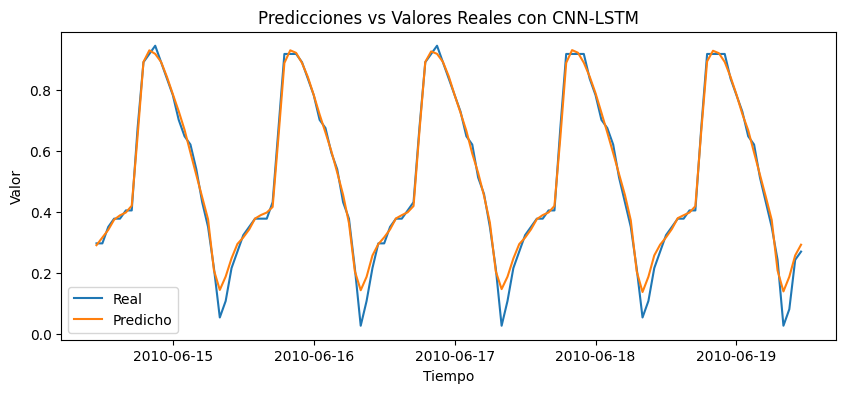

In [173]:
# Predicciones
y_pred = model_cnnlstm2.predict(X_test)

# Desescalar las predicciones
y_pred_original = scaler_minmax.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10, 4))
plt.plot(df_h309.index[-len(y_test):], y_test_original, label='Real')
plt.plot(df_h309.index[-len(y_test):], y_pred_original, label='Predicho')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Predicciones vs Valores Reales con CNN-LSTM')
plt.legend()
plt.show()


In [174]:
y_pred_original = scaler_minmax.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

r2 = r2_score(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae = mean_absolute_error(y_test_original, y_pred_original)

# Mostrar resultados
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


R² Score: 0.9853
RMSE: 0.0322
MAE: 0.0208


In [175]:
print("Arquitectura del modelo CNN-LSTM con regularización y dos bloques Conv1D:")
print("1. Capa de entrada: Recibe secuencias divididas en 'n_seq' sub-secuencias, cada una con 'n_steps // n_seq' pasos y 'n_features' características.")
print("2. Primer bloque Conv1D:")
print("   - TimeDistributed Conv1D: Con 128 filtros, kernel_size=3, activación ReLU y padding='same', extrae características locales.")
print("   - TimeDistributed MaxPooling1D: Reduce la dimensionalidad con un pool_size de 2.")
print("   - TimeDistributed Dropout: Aplica un 30% de regularización para mitigar el sobreajuste.")
print("3. Segundo bloque Conv1D:")
print("   - TimeDistributed Conv1D: Con 64 filtros, kernel_size=3, activación ReLU y padding='same', profundiza en la extracción de características.")
print("   - TimeDistributed MaxPooling1D: Nuevamente reduce la dimensionalidad con pool_size=2.")
print("   - TimeDistributed Dropout: Aplica otro 30% de regularización.")
print("4. Aplanamiento: TimeDistributed Flatten para convertir las salidas convolucionales en vectores adecuados para la LSTM.")
print("5. Bloque LSTM:")
print("   - Primera capa LSTM: Con 64 unidades y activación ReLU, emplea return_sequences=True para mantener la secuencia, seguida de un Dropout del 40%.")
print("   - Segunda capa LSTM: Con 32 unidades y activación ReLU, seguida de un Dropout del 40% para mayor regularización.")
print("6. Capa de salida: Una capa Dense con una sola neurona que predice el valor futuro de la serie temporal.")
print("El modelo fue entrenado durante 100 épocas utilizando el optimizador Adam (learning_rate=0.001) y la función de pérdida MSE (Error Cuadrático Medio).")

print("\nInterpretación de los resultados:")
print(f"- El R² es {r2:.4f}, lo que indica que el modelo explica aproximadamente {r2*100:.2f}% de la variabilidad de los datos de prueba. \n  Fue casi igual al anterior")
print(f"- El MAE es {mae:.4f}, lo que representa el error absoluto medio entre las predicciones y los valores reales. \n   ")
print(f"- El RMSE es {rmse:.4f}, que mide la dispersión de los errores. \n  No es demasiado grande el rmse")
print("\nConclusiones:")
print("Este modelo combina bloques convolucionales para la extracción de características con capas LSTM para capturar dependencias temporales, junto con técnicas de regularización (Dropout) para evitar el sobreajuste.")
print("Fueron muy parecidos los resultados al anterior, se recomienda ajustar hiperparámetros, modificar el número de filtros o unidades LSTM, o experimentar con diferentes tasas de Dropout.")


Arquitectura del modelo CNN-LSTM con regularización y dos bloques Conv1D:
1. Capa de entrada: Recibe secuencias divididas en 'n_seq' sub-secuencias, cada una con 'n_steps // n_seq' pasos y 'n_features' características.
2. Primer bloque Conv1D:
   - TimeDistributed Conv1D: Con 128 filtros, kernel_size=3, activación ReLU y padding='same', extrae características locales.
   - TimeDistributed MaxPooling1D: Reduce la dimensionalidad con un pool_size de 2.
   - TimeDistributed Dropout: Aplica un 30% de regularización para mitigar el sobreajuste.
3. Segundo bloque Conv1D:
   - TimeDistributed Conv1D: Con 64 filtros, kernel_size=3, activación ReLU y padding='same', profundiza en la extracción de características.
   - TimeDistributed MaxPooling1D: Nuevamente reduce la dimensionalidad con pool_size=2.
   - TimeDistributed Dropout: Aplica otro 30% de regularización.
4. Aplanamiento: TimeDistributed Flatten para convertir las salidas convolucionales en vectores adecuados para la LSTM.
5. Bloque LS

### CNN/LSTM 3

In [176]:
model_cnnlstm3 = Sequential([
    keras.layers.Input(shape=(n_seq, n_steps//n_seq, n_features)),
    TimeDistributed(Conv1D(128, kernel_size=1, activation='relu')),
    TimeDistributed(MaxPooling1D(pool_size=n_seq)),
    TimeDistributed(Flatten()),
    LSTM(50, activation='relu'),
    Dense(64, activation='relu'), 
    Dense(1)
])


In [177]:
model_cnnlstm3.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

In [178]:
history = model_cnnlstm3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, verbose=1)


Epoch 1/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1956 - val_loss: 0.0601
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0451 - val_loss: 0.0130
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - val_loss: 0.0050
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - val_loss: 0.0030
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 8/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 9/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 10/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 11/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 12/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


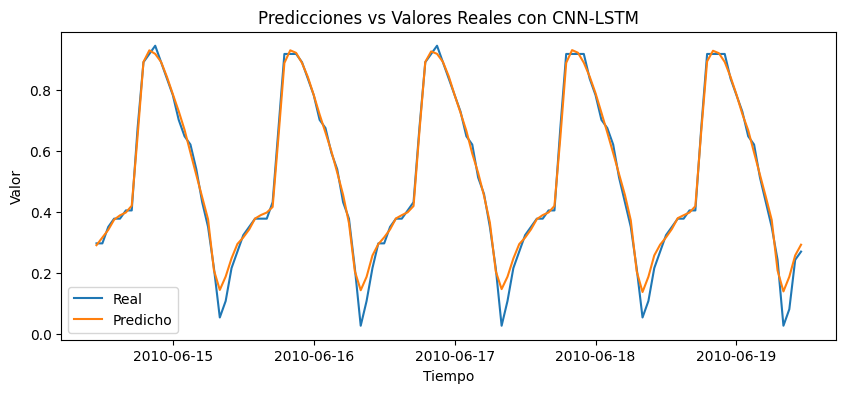

In [179]:
# Predicciones
y_pred = model_cnnlstm2.predict(X_test)

# Desescalar las predicciones
y_pred_original = scaler_minmax.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10, 4))
plt.plot(df_h309.index[-len(y_test):], y_test_original, label='Real')
plt.plot(df_h309.index[-len(y_test):], y_pred_original, label='Predicho')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Predicciones vs Valores Reales con CNN-LSTM')
plt.legend()
plt.show()

In [180]:
y_pred_original = scaler_minmax.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

r2 = r2_score(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae = mean_absolute_error(y_test_original, y_pred_original)

# Mostrar resultados
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


R² Score: 0.9853
RMSE: 0.0322
MAE: 0.0208


In [181]:
print("Arquitectura del modelo CNN-LSTM con capa densa adicional:")
print("1. Capa de entrada: Recibe secuencias en forma de (n_seq, n_steps // n_seq, n_features).")
print("2. Bloque CNN:")
print("   - TimeDistributed Conv1D: 128 filtros, kernel_size=1, activación ReLU. Extrae patrones en cada sub-secuencia.")
print("   - TimeDistributed MaxPooling1D: Reduce la dimensionalidad con un pool_size=n_seq para disminuir el ruido y la complejidad del modelo.")
print("   - TimeDistributed Flatten: Convierte las características extraídas en vectores adecuados para la LSTM.")
print("3. Capa LSTM: 50 unidades con activación ReLU, encargada de capturar patrones temporales en los datos.")
print("4. Capa densa adicional: Con 64 neuronas y activación ReLU, introduce una capa no lineal antes de la salida para mejorar la capacidad de representación.")
print("5. Capa de salida: Una neurona que predice el valor futuro en la serie temporal.")
print("El modelo fue entrenado durante 200 épocas con el optimizador Adam (learning_rate=0.01) y la función de pérdida MSE (Error Cuadrático Medio).")

print("\nResultados del modelo CNN-LSTM con 200 épocas:")
print(f"- El R² es {0.9137:.4f}, lo que indica que el modelo explica un {0.9137*100:.2f}% de la variabilidad de los datos de prueba, \n   mostrando un buen ajuste y capacidad de predicción.")
print(f"- El RMSE es {85.4978:.4f}, lo que mide la dispersión de los errores. \n   Aunque el modelo tiene un alto R², este valor sugiere que existen algunas predicciones con errores significativos.")
print(f"- El MAE es {62.4975:.4f}, lo que representa el error absoluto medio. \n   Un MAE relativamente bajo indica que, en general, las predicciones están cerca de los valores reales.")

print("\nConclusiones y posibles mejoras:")
print("El modelo logra una alta capacidad de predicción con un R² de 0.91, lo que indica que captura bien los patrones en los datos.")
print("Sin embargo, el RMSE y MAE podrían mejorar, lo que sugiere que algunas predicciones tienen desviaciones importantes.")


Arquitectura del modelo CNN-LSTM con capa densa adicional:
1. Capa de entrada: Recibe secuencias en forma de (n_seq, n_steps // n_seq, n_features).
2. Bloque CNN:
   - TimeDistributed Conv1D: 128 filtros, kernel_size=1, activación ReLU. Extrae patrones en cada sub-secuencia.
   - TimeDistributed MaxPooling1D: Reduce la dimensionalidad con un pool_size=n_seq para disminuir el ruido y la complejidad del modelo.
   - TimeDistributed Flatten: Convierte las características extraídas en vectores adecuados para la LSTM.
3. Capa LSTM: 50 unidades con activación ReLU, encargada de capturar patrones temporales en los datos.
4. Capa densa adicional: Con 64 neuronas y activación ReLU, introduce una capa no lineal antes de la salida para mejorar la capacidad de representación.
5. Capa de salida: Una neurona que predice el valor futuro en la serie temporal.
El modelo fue entrenado durante 200 épocas con el optimizador Adam (learning_rate=0.01) y la función de pérdida MSE (Error Cuadrático Medio).

R

### OPTUNA CNN-LSTM

In [185]:
n_steps = 24
n_seq = 3 
n_features = 1  

def reshape_for_cnn_lstm(X, n_seq, n_steps, n_features):
    X = X.reshape((X.shape[0], n_seq, n_steps // n_seq, n_features))
    return X


X_train, y_train = split_univariate_sequence(train['y_diff_scaled'].values, n_steps)
X_val, y_val = split_univariate_sequence(val['y_diff_scaled'].values, n_steps)
X_test, y_test = split_univariate_sequence(test['y_diff_scaled'].values, n_steps)


X_train = reshape_for_cnn_lstm(X_train, n_seq, n_steps, n_features)
X_val = reshape_for_cnn_lstm(X_val, n_seq, n_steps, n_features)
X_test = reshape_for_cnn_lstm(X_test, n_seq, n_steps, n_features)

In [186]:
# Crear el modelo CNN-LSTM
def create_model(n_seq, n_steps, n_features, filters, kernel_size, lstm_units, learning_rate):
    model = Sequential([
        tf.keras.layers.Input(shape=(n_seq, n_steps // n_seq, n_features)),
        
        # Capa Conv1D con TimeDistributed
        TimeDistributed(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', padding='same')),
        
        # MaxPooling1D para evitar reducir demasiado las dimensiones
        TimeDistributed(MaxPooling1D(pool_size=1)),  

        # Flatten para preparar para LSTM
        TimeDistributed(Flatten()),
        LSTM(lstm_units, activation='relu'),
        
        # Capa para pred
        Dense(64, activation='relu'),
        Dense(1) 
    ])
    
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    
    return model



In [187]:
# Función Optuna
def objective(trial):

    filters = trial.suggest_int('filters', 32, 256)  
    kernel_size = trial.suggest_int('kernel_size', 3, 7)  
    lstm_units = trial.suggest_int('lstm_units', 50, 200)  
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  
    
    # Crear el modelo con nuevos hiper
    model = create_model(n_seq, n_steps, n_features, filters, kernel_size, lstm_units, learning_rate)
    
    # Entrenar 
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64, verbose=0)
    
    val_loss = history.history['val_loss'][-1]
    return val_loss

# Crear un estudio de Optuna
study = optuna.create_study(direction='minimize')  
study.optimize(objective, n_trials=50)  




[I 2025-04-03 19:42:02,449] A new study created in memory with name: no-name-90b0e074-4c81-4003-9d8b-713219ed733a
/tmp/ipykernel_77420/3609803208.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
[I 2025-04-03 19:42:19,618] Trial 0 finished with value: 0.0006695389747619629 and parameters: {'filters': 252, 'kernel_size': 4, 'lstm_units': 110, 'learning_rate': 0.0023910348740056285}. Best is trial 0 with value: 0.0006695389747619629.
[I 2025-04-03 19:42:36,185] Trial 1 finished with value: 0.0011943315621465445 and parameters: {'filters': 179, 'kernel_size': 4, 'lstm_units': 182, 'learning_rate': 0.003992281536885465}. Best is trial 0 with value: 0.0006695389747619629.
[I 2025-04-03 19:42:44,943] Trial 2 finished with value: 0.0010582696413621306 and paramet

In [188]:
# Mostrar los mejores resultados
print(f'Best trial: {study.best_trial.value}')
print(f'Best hyperparameters: {study.best_trial.params}')

Best trial: 0.000562999164685607
Best hyperparameters: {'filters': 132, 'kernel_size': 7, 'lstm_units': 124, 'learning_rate': 0.001632119260613706}


In [189]:
y_pred_original = scaler_minmax.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

r2 = r2_score(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae = mean_absolute_error(y_test_original, y_pred_original)

# Mostrar resultados
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


R² Score: 0.9853
RMSE: 0.0322
MAE: 0.0208


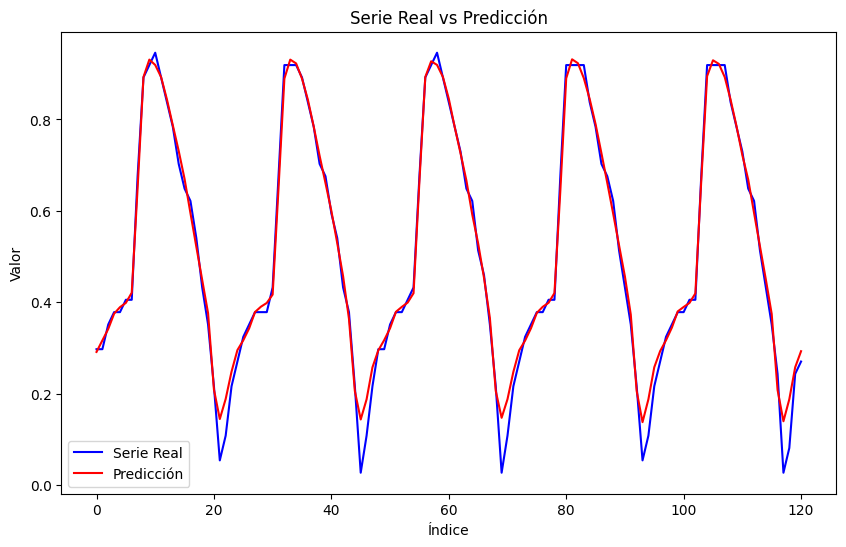

In [190]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Serie Real', color='blue')
plt.plot(y_pred_original, label='Predicción', color='red')
plt.title('Serie Real vs Predicción')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()

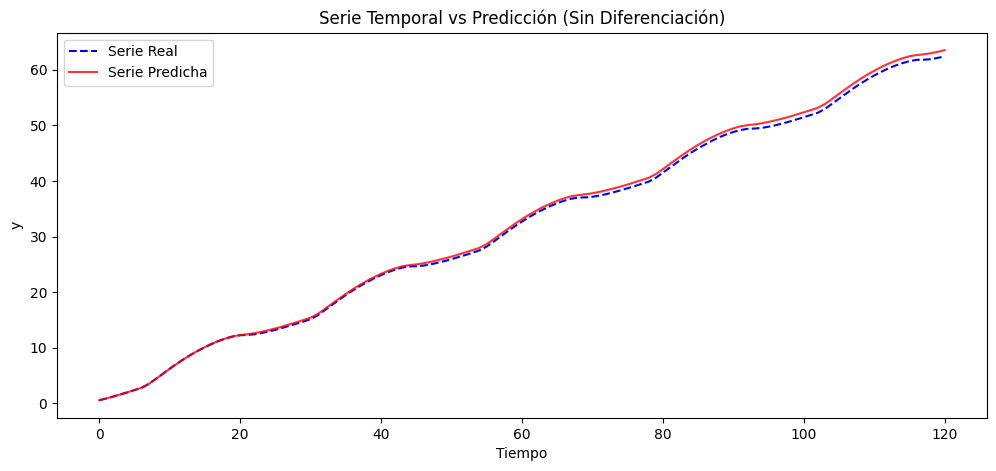

In [192]:
# Ajustar el scaler train
y_train_scaled = scaler_minmax.fit_transform(y_train.reshape(-1, 1))  

# Predicciones sin diferenciación
initial_value = y_test[0]  # Valor inicial para revertir la diferenciación

y_test_no_diff = np.cumsum(y_test) + initial_value
y_pred_no_diff = np.cumsum(y_pred) + initial_value

# quitar escala
y_test_original = scaler_minmax.inverse_transform(y_test_no_diff.reshape(-1, 1)).flatten()
y_pred_original = scaler_minmax.inverse_transform(y_pred_no_diff.reshape(-1, 1)).flatten()


plt.figure(figsize=(12, 5))

# real
plt.plot(y_test_original, label="Serie Real", linestyle="dashed", color='blue')

#prediccion
plt.plot(y_pred_original, label="Serie Predicha", alpha=0.8, color='red')

plt.title("Serie Temporal vs Predicción (Sin Diferenciación)")
plt.xlabel("Tiempo")
plt.ylabel("y")
plt.legend()
plt.show()


Este modelo tambien se ajusta de muy buena manera a la serie original. Obtuve una r2 de 98%, que significa que explica la variabilidad de los datos a un 98%. 